# Notebook for creating the result plots for my master thesis

***
Hannah Weiser

## Imports

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np

## Input paths

In [2]:
metric_folder = "H:/movingtree_b2h/data/metrics"

tls_height_metrics = "tls_height_metrics.pkl"
tls_height_metrics_mls = "tls_height_metrics_mls.pkl"
tls_geometric_feats = "tls_geometric_feats.pkl"
tls_geometric_feats_mls = "tls_geometric_feats_mls.pkl"
tls_voxel_metrics = "tls_voxel_metrics.pkl"
tls_voxel_metrics_mls = "tls_voxel_metrics_mls.pkl"
tls_la_metrics = "tls_lai_gap_frac.pkl"
tls_la_metrics_mls = "tls_lai_gap_frac_mls.pkl"
tls_la_tri = "leaf_areas_tri.txt"
tls_la_tri_mls = "leaf_areas_tri_mls.txt"
la_reference = "leaf_area_reference.txt"
uls_la_amapvox = "la_amapvox.txt"
tls_la_amapvox = "la_amapvox_tls.txt"

uls_height_metrics = "uls_height_metrics.pkl"
uls_geometric_feats = "uls_geometric_feats.pkl"
uls_voxel_metrics = "uls_voxel_metrics.pkl"

We also define some global plotting settings

In [3]:
# define color palettes
okabe_ito = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
matplotlib.rc('font', size=14)
matplotlib.rc('axes', axisbelow=True)   # gridlines below
matplotlib.rc('axes', titlesize=14)
matplotlib.rc('axes', labelsize=14)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=14)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=14)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=14, title_fontsize=14)    # legend fontsize
matplotlib.rc('figure', titlesize=14)  # fontsize of the figure title

dpi = 300
plot_dir = Path("H:/movingtree_b2h/data/plots/final/300dpi")

## Height metrics
### TLS

In [4]:
hm_df = pd.read_pickle(Path(metric_folder) / tls_height_metrics)
hm_means_by_scenario = hm_df.groupby(["scenario"]).agg("mean")

hm_mls_df = pd.read_pickle(Path(metric_folder) / tls_height_metrics_mls)
hm_m_deciles_a = hm_means_by_scenario.loc["a", ["D1", "D2", "D3", "D4", "D5", "D6", "D7", "D8", "D9"]]
hm_m_deciles_b = hm_means_by_scenario.loc["b", ["D1", "D2", "D3", "D4", "D5", "D6", "D7", "D8", "D9"]]
hm_m_deciles_c = hm_means_by_scenario.loc["c", ["D1", "D2", "D3", "D4", "D5", "D6", "D7", "D8", "D9"]]
hm_m_deciles_static = hm_means_by_scenario.loc["static", ["D1", "D2", "D3", "D4", "D5", "D6", "D7", "D8", "D9"]]

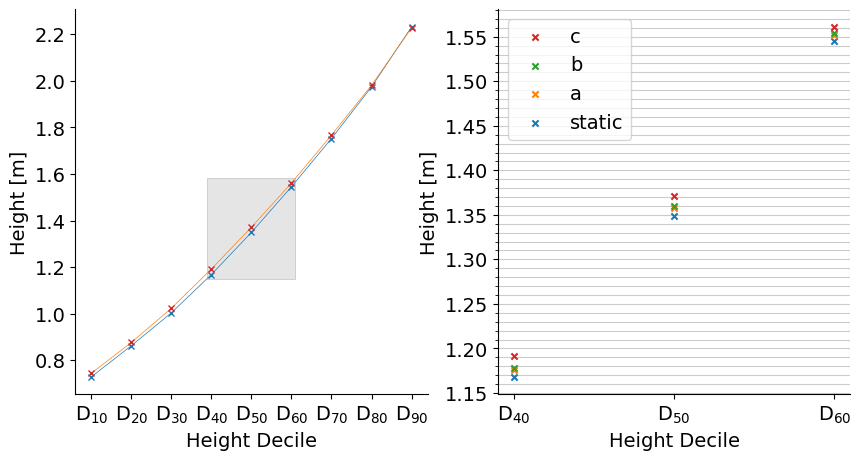

In [45]:
import matplotlib.ticker as ticker
from matplotlib.patches import Rectangle

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

# Create main container
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(10, 5))

# gridlines
ax1.yaxis.grid(which="both", color='0.8')
ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator(5))

# Create zoom-in plot
ax1.scatter([0, 1, 2], hm_m_deciles_static[3:6], marker="x", label="static", s=20)
ax1.scatter([0, 1, 2], hm_m_deciles_a[3:6], marker="x", label="a", s=20)
ax1.scatter([0, 1, 2], hm_m_deciles_b[3:6], marker="x", label="b", s=20)
ax1.scatter([0, 1, 2], hm_m_deciles_c[3:6], marker="x", label="c", s=20)
ax1.set_xticks([0, 1, 2], ["D$_{40}$", "D$_{50}$", "D$_{60}$"])
handles, labels = plt.gca().get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1], loc='upper left')
ax1.set_ylabel("Height [m]")
ax1.set_xlabel("Height Decile")
for pos in ['right', 'top']:
    ax1.spines[pos].set_visible(False)
    ax2.spines[pos].set_visible(False)

xs = np.arange(0, 9)
ax2.plot(hm_m_deciles_static, "x", lw=0.5, markersize=5, c=colors[0])
ax2.plot(hm_m_deciles_static, label="a", lw=0.5)
# ax_new.plot(hm_m_deciles_a, label="a", lw=0.5)
# ax_new.plot(hm_m_deciles_b, label="b", lw=0.5)
ax2.plot(hm_m_deciles_c, label="b", lw=0.5)
ax2.plot(hm_m_deciles_c, "x", label="c", lw=0.5, markersize=5, c=colors[3])

xlims = ax1.get_xlim()
ylims = ax1.get_ylim()
ax2.add_patch(Rectangle(([xlims[0]+3, ylims[0]]), xlims[1]-xlims[0], ylims[1]-ylims[0], facecolor="grey", alpha=0.2, ec="k", lw=0.5))
ax2.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8], ["D$_{10}$", "D$_{20}$", "D$_{30}$", "D$_{40}$", "D$_{50}$", "D$_{60}$", "D$_{70}$", "D$_{80}$", "D$_{90}$"])
ax2.set_ylabel("Height [m]")
ax2.set_xlabel("Height Decile")

# Save figure with nice margin
plt.savefig(plot_dir / 'tls_height_deciles.png', dpi=dpi, bbox_inches = 'tight', pad_inches = .1)
plt.show()

## Voxel metrics
### TLS

In [6]:
vm_df = pd.read_pickle(Path(metric_folder) / tls_voxel_metrics)
vm_df = vm_df.rename(index={'static': '0'})
vm_df_grouped_mean = vm_df.groupby(["scenario", "voxel_size"]).mean()

In [7]:
# 90 % confidence interval to create error bars
vm_df_numeric = vm_df.astype("float")
p05 = vm_df_numeric.groupby(["scenario", "voxel_size"]).quantile(0.05).unstack(level=0) - vm_df_grouped_mean.unstack(level=0)
p95 = vm_df_numeric.groupby(["scenario", "voxel_size"]).quantile(0.95).unstack(level=0) - vm_df_grouped_mean.unstack(level=0)
err_conf_percfilled = np.concatenate((np.abs(p05["percentage_filled_vox"].to_numpy()), p95["percentage_filled_vox"].to_numpy()), axis=1).reshape(4, 2, 4).T
err_conf_mdnppv = np.concatenate((np.abs(p05["median_ppv"].to_numpy()), p95["median_ppv"].to_numpy()), axis=1).reshape(4, 2, 4).T
err_conf_maxppv = np.concatenate((np.abs(p05["max_ppv"].to_numpy()), p95["max_ppv"].to_numpy()), axis=1).reshape(4, 2, 4).T
err_conf_sdppv = np.concatenate((np.abs(p05["std_ppv"].to_numpy()), p95["std_ppv"].to_numpy()), axis=1).reshape(4, 2, 4).T

error_kw = {"capsize": 2, "elinewidth": 1}

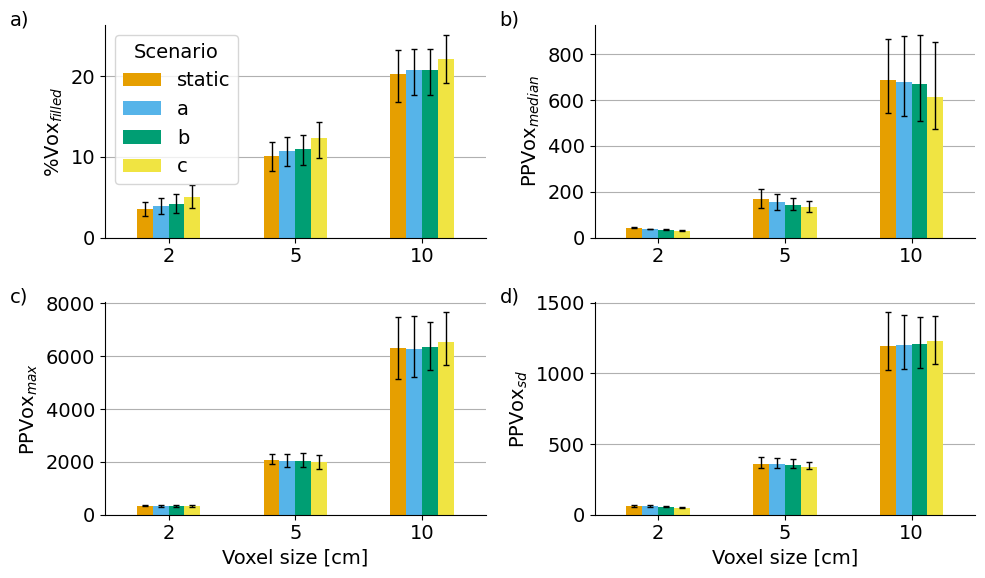

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 6))
vm_df_grouped_mean["percentage_filled_vox"].unstack(level=0).plot(kind='bar', ax=ax1, color=okabe_ito[:4], rot=0, yerr=err_conf_percfilled, error_kw=error_kw)
vm_df_grouped_mean["median_ppv"].unstack(level=0).plot(kind='bar', ax=ax2, color=okabe_ito[:4], legend=False, rot=0, yerr=err_conf_mdnppv, error_kw=error_kw)
vm_df_grouped_mean["max_ppv"].unstack(level=0).plot(kind='bar', ax=ax3, color=okabe_ito[:4], legend=False, rot=0, yerr=err_conf_maxppv, error_kw=error_kw)
vm_df_grouped_mean["std_ppv"].unstack(level=0).plot(kind='bar', ax=ax4, color=okabe_ito[:4], legend=False, rot=0, yerr=err_conf_sdppv, error_kw=error_kw)
for ax, label in zip([ax1, ax2, ax3, ax4], ["a)", "b)", "c)", "d)"]):
    for pos in ['right', 'top']:
        ax.spines[pos].set_visible(False)
    ax.yaxis.grid()
    ax.set_xlabel("")
    ax.text(-0.25, 1.0, label, transform=ax.transAxes, fontsize=14)
    ax.set_xlim(0.5, 3.5)
for ax in [ax3, ax4]:
    ax.set_xlabel("Voxel size [cm]")
ax1.legend(labels=["static", "a", "b", "c"], title="Scenario")
ax1.set_ylabel("Filled voxels [%]")
ax2.set_ylabel("Mdn no. points per voxel")
ax3.set_ylabel("Max no. points per voxel")
ax4.set_ylabel("SD no. points per voxel")
ax1.set_ylabel("%Vox$_{filled}$")
ax2.set_ylabel("PPVox$_{median}$")
ax3.set_ylabel("PPVox$_{max}$")
ax4.set_ylabel("PPVox$_{sd}$")
plt.tight_layout()
plt.savefig(plot_dir / "vm_bar_error_conf.png", dpi=dpi, bbox_inches='tight')
plt.show()

Compare before and after MLS

In [9]:
vm_mls_df = pd.read_pickle(Path(metric_folder) / tls_voxel_metrics_mls)
vm_mls_df = vm_mls_df.rename(index={'static': '0'})
vm_mls_df_grouped_mean = vm_mls_df.groupby(["scenario", "voxel_size"]).mean()

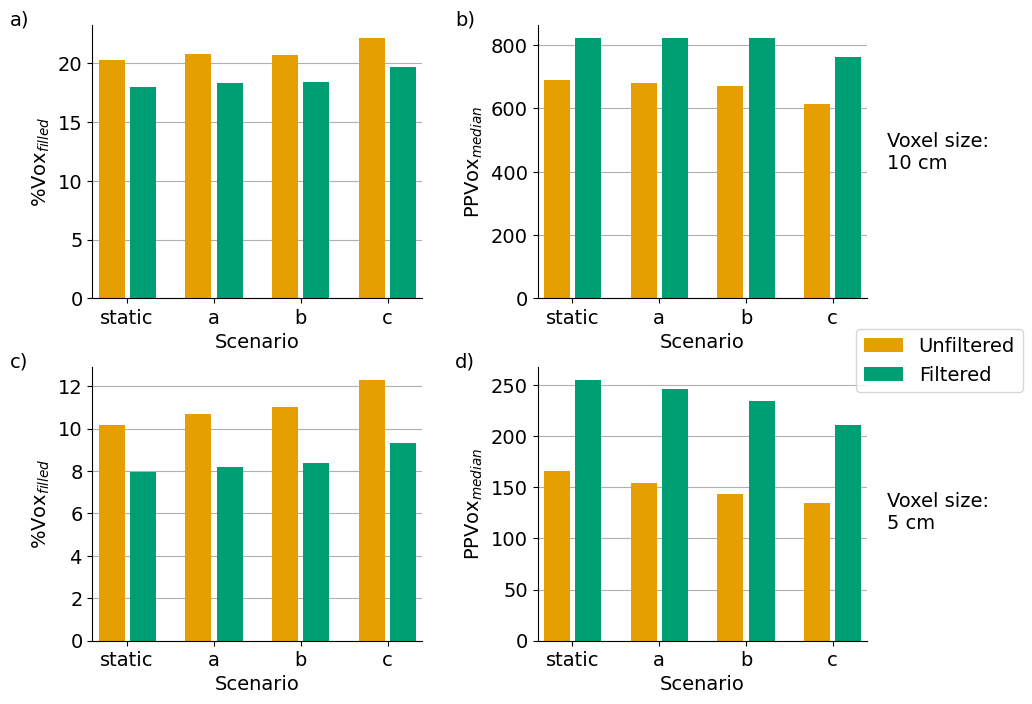

In [10]:
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2, 2, figsize=(10, 8))
vm_df_grouped_mean.xs(10, level=1)["percentage_filled_vox"].plot(kind='bar', ax=ax1, color=okabe_ito[0], rot=0, width=0.3, position=1.1)
vm_mls_df_grouped_mean.xs(10, level=1)["percentage_filled_vox"].plot(kind='bar', ax=ax1, color=okabe_ito[2], rot=0, width=0.3, position=-0.1)
vm_df_grouped_mean.xs(10, level=1)["median_ppv"].plot(kind='bar', ax=ax2, color=okabe_ito[0], rot=0, width=0.3, position=1.1, label="Without MLS filter")
vm_mls_df_grouped_mean.xs(10, level=1)["median_ppv"].plot(kind='bar', ax=ax2, color=okabe_ito[2], rot=0, width=0.3, position=-0.1, label="With MLS filter")
for ax, label in zip([ax1, ax2], ["a)", "b)"]):
    for pos in ['right', 'top']:
        ax.spines[pos].set_visible(False)
    ax.text(-0.25, 1.0, label, transform=ax.transAxes, fontsize=14)
    ax.yaxis.grid()
    ax.set_xlabel("Scenario")
    ax.set_xticks([0, 1, 2, 3], ["static", "a", "b", "c"])
    ax.set_xlim(-0.4, 3.4)
#ax1.set_ylabel("Filled voxels [%]")
#ax2.set_ylabel("Mdn no. points per voxel")
ax1.set_ylabel("%Vox$_{filled}$")
ax2.set_ylabel("PPVox$_{median}$")
vm_df_grouped_mean.xs(5, level=1)["percentage_filled_vox"].plot(kind='bar', ax=ax3, color=okabe_ito[0], rot=0, width=0.3, position=1.1)
vm_mls_df_grouped_mean.xs(5, level=1)["percentage_filled_vox"].plot(kind='bar', ax=ax3, color=okabe_ito[2], rot=0, width=0.3, position=-0.1)
vm_df_grouped_mean.xs(5, level=1)["median_ppv"].plot(kind='bar', ax=ax4, color=okabe_ito[0], rot=0, width=0.3, position=1.1, label="Unfiltered")
vm_mls_df_grouped_mean.xs(5, level=1)["median_ppv"].plot(kind='bar', ax=ax4, color=okabe_ito[2], rot=0, width=0.3, position=-0.1, label="Filtered")
for ax, label in zip([ax3, ax4], ["c)", "d)"]):
    for pos in ['right', 'top']:
        ax.spines[pos].set_visible(False)
    ax.text(-0.25, 1.0, label, transform=ax.transAxes, fontsize=14)
    ax.yaxis.grid()
    ax.set_xlabel("Scenario")
    ax.set_xticks([0, 1, 2, 3], ["static", "a", "b", "c"])
    ax.set_xlim(-0.4, 3.4)
# ax3.set_ylabel("Filled voxels [%]")
# ax4.set_ylabel("Mdn no. points per voxel")
ax3.set_ylabel("%Vox$_{filled}$")
ax4.set_ylabel("PPVox$_{median}$")
ax4.legend(bbox_to_anchor=(1.065, 0.46), loc="center right",  bbox_transform=fig.transFigure)
plt.text(0.92, 0.7, "Voxel size:\n10 cm", ha="left", transform=fig.transFigure, fontsize=14)
plt.text(0.92, 0.25, "Voxel size:\n5 cm", ha="left", transform=fig.transFigure, fontsize=14)
# plt.tight_layout()
fig.subplots_adjust(hspace=0.25, wspace=0.35)
plt.savefig(plot_dir / "vm_bar_mls_2and5.png", dpi=dpi, bbox_inches='tight')
plt.show()

### ULS

In [11]:
vm_df_uls = pd.read_pickle(Path(metric_folder) / uls_voxel_metrics)
vm_df_uls = vm_df_uls.rename(index={'static': '0'})
vm_df_uls_grouped_mean = vm_df_uls.groupby(["scenario", "voxel_size"]).mean()
vm_df_uls_numeric = vm_df_uls.astype("float")
p05_uls = vm_df_uls_numeric.groupby(["scenario", "voxel_size"]).quantile(0.05).unstack(level=0) - vm_df_uls_grouped_mean.unstack(level=0)
p95_uls = vm_df_uls_numeric.groupby(["scenario", "voxel_size"]).quantile(0.95).unstack(level=0) - vm_df_uls_grouped_mean.unstack(level=0)
err_conf_uls_percfilled = np.concatenate((np.abs(p05_uls["percentage_filled_vox"].to_numpy()), p95_uls["percentage_filled_vox"].to_numpy()), axis=1).reshape(3, 2, 4).T
err_conf_uls_mdnppv = np.concatenate((np.abs(p05_uls["median_ppv"].to_numpy()), p95_uls["median_ppv"].to_numpy()), axis=1).reshape(3, 2, 4).T
err_conf_uls_maxppv = np.concatenate((np.abs(p05_uls["max_ppv"].to_numpy()), p95_uls["max_ppv"].to_numpy()), axis=1).reshape(3, 2, 4).T
err_conf_uls_sdppv = np.concatenate((np.abs(p05_uls["std_ppv"].to_numpy()), p95_uls["std_ppv"].to_numpy()), axis=1).reshape(3, 2, 4).T

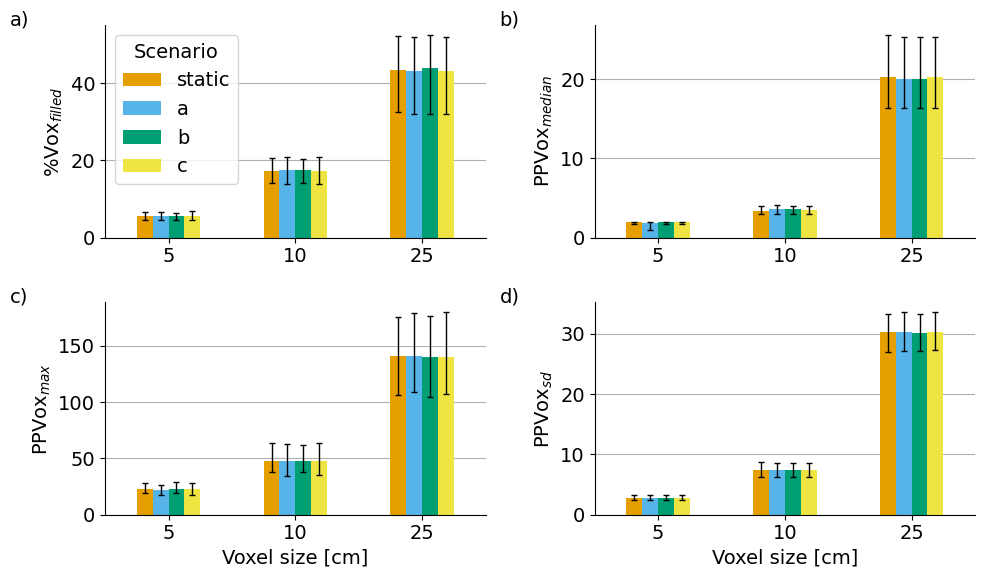

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 6))
vm_df_uls_grouped_mean["percentage_filled_vox"].unstack(level=0).plot(kind='bar', ax=ax1, color=okabe_ito[:4], yerr=err_conf_uls_percfilled, error_kw=error_kw)
vm_df_uls_grouped_mean["median_ppv"].unstack(level=0).plot(kind='bar', ax=ax2, color=okabe_ito[:4], legend=False, yerr=err_conf_uls_mdnppv, error_kw=error_kw)
vm_df_uls_grouped_mean["max_ppv"].unstack(level=0).plot(kind='bar', ax=ax3, color=okabe_ito[:4], legend=False, yerr=err_conf_uls_maxppv, error_kw=error_kw)
vm_df_uls_grouped_mean["std_ppv"].unstack(level=0).plot(kind='bar', ax=ax4, color=okabe_ito[:4], legend=False, yerr=err_conf_uls_sdppv, error_kw=error_kw)
for ax, label in zip([ax1, ax2, ax3, ax4], ["a)", "b)", "c)", "d)"]):
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_xlabel("")
    ax.yaxis.grid()
    ax.text(-0.25, 1.0, label, transform=ax.transAxes, fontsize=14)
    ax.set_xticklabels([5, 10, 25], rotation=0)
for ax in [ax3, ax4]:
    ax.set_xlabel("Voxel size [cm]")
ax1.legend(labels=["static", "a", "b", "c"], title="Scenario")
ax1.set_ylabel("%Vox$_{filled}$")
ax2.set_ylabel("PPVox$_{median}$")
ax3.set_ylabel("PPVox$_{max}$")
ax4.set_ylabel("PPVox$_{sd}$")
plt.tight_layout()
plt.savefig(plot_dir / "vm_bar_uls.png", dpi=dpi, bbox_inches='tight')
plt.show()

## LA metrics
### TLS
Load all the data to data frames.

In [13]:
la_ref_df = pd.read_csv(Path(metric_folder) / la_reference, sep=" ", index_col="tree_id")
la_df = pd.read_pickle(Path(metric_folder) / tls_la_metrics)
la_mls_df = pd.read_pickle(Path(metric_folder) / tls_la_metrics_mls)
la_df_tri = pd.read_csv(Path(metric_folder) / tls_la_tri, sep=" ")
la_df_tri_mls = pd.read_csv(Path(metric_folder) / tls_la_tri_mls, sep=" ")
la_df_amapvox = pd.read_csv(Path(metric_folder) / tls_la_amapvox, sep=" ")

Merge all the data to one data frame.

In [14]:
la_df = pd.merge(la_df[["alpha_leaf_area", "poisson_leaf_area", "poisson_leaf_area_fixedthresh"]].reset_index(), la_mls_df[["alpha_leaf_area", "poisson_leaf_area", "poisson_leaf_area_fixedthresh"]].reset_index(), on=["tree_id", "scenario"], suffixes=('', '_mls')).set_index(["scenario", "tree_id"])
la_df = pd.merge(la_df.reset_index(), la_df_tri, on=["tree_id", "scenario"], suffixes=('', '_mls')).set_index(["scenario", "tree_id"])
la_df = pd.merge(la_df.reset_index(), la_df_tri_mls, on=["tree_id", "scenario"], suffixes=('', '_mls')).set_index(["scenario", "tree_id"])
la_df = pd.merge(la_df.reset_index(), la_ref_df, on=["tree_id"]).set_index(["scenario", "tree_id"])
la_df_amapvox = pd.merge(la_df_amapvox.reset_index(), la_ref_df, on=["tree_id"]).set_index(["scenario", "tree_id"])
display(la_df.head(n=8))
display(la_df_amapvox.head(n=8))

,,alpha_leaf_area,poisson_leaf_area,poisson_leaf_area_fixedthresh,alpha_leaf_area_mls,poisson_leaf_area_mls,poisson_leaf_area_fixedthresh_mls,la_tri,la_tri_mls,leaf_area
scenario,tree_id,,,,,,,,,
static,1,1.681731,1.243386,1.25764,0.916082,0.934949,0.935832,2.037796,1.116022,1.039431
a,1,1.822761,1.450392,1.55783,0.995654,0.950729,0.961511,3.059297,1.238979,1.039431
b,1,1.926379,1.674563,1.835536,1.07634,0.973276,0.984954,4.047646,1.345897,1.039431
c,1,2.335089,2.162125,2.413652,1.349153,1.11602,1.15551,5.844715,1.937882,1.039431
static,2,1.941455,1.321535,1.392733,1.064222,1.030752,1.078145,2.533824,1.250246,1.002926
a,2,2.046072,1.524503,1.648239,1.148555,1.055606,1.115163,3.415663,1.403292,1.002926
b,2,2.179475,1.728881,1.923894,1.251454,1.066265,1.126842,4.212066,1.563100,1.002926
c,2,2.481838,2.131286,2.426033,1.477094,1.167084,1.242618,5.816502,2.002827,1.002926


,,index,la_t,la_att_fpl,la_att_ppl,leaf_area
scenario,tree_id,,,,,
a,10,0,0.967093,1.182194,1.097305,1.260206
b,10,1,1.038859,1.262606,1.181977,1.260206
c,10,2,1.066981,1.372853,1.249206,1.260206
static,10,3,0.969633,1.168151,1.097474,1.260206
a,11,4,1.465463,1.774585,1.759358,1.160022
b,11,5,1.420574,1.747370,1.715206,1.160022
c,11,6,1.414486,1.820714,1.771071,1.160022
static,11,7,1.444796,1.736649,1.746163,1.160022


Create new columns with the differences.

In [15]:
la_df["alpha_la_diff"] = (la_df["alpha_leaf_area"]-la_df["leaf_area"])
la_df["alpha_la_mls_diff"] = (la_df["alpha_leaf_area_mls"]-la_df["leaf_area"])
la_df["tri_la_diff"] = (la_df["la_tri"]-la_df["leaf_area"])
la_df["tri_la_mls_diff"] = (la_df["la_tri_mls"]-la_df["leaf_area"])
la_df["poisson_la_diff"] = (la_df["poisson_leaf_area"]-la_df["leaf_area"])
la_df["poisson_la_fixedthresh_diff"] = (la_df["poisson_leaf_area_fixedthresh"]-la_df["leaf_area"])
la_df["poisson_la_mls_diff"] = (la_df["poisson_leaf_area_mls"]-la_df["leaf_area"])
la_df["poisson_la_mls_fixedthresh_diff"] = (la_df["poisson_leaf_area_fixedthresh_mls"]-la_df["leaf_area"])
la_df_amapvox["la_t_diff"] = (la_df_amapvox["la_t"] - la_df_amapvox["leaf_area"])
la_df_amapvox["la_att_fpl_diff"] = (la_df_amapvox["la_att_fpl"] - la_df_amapvox["leaf_area"])
la_df_amapvox["la_att_ppl_diff"] = (la_df_amapvox["la_att_ppl"] - la_df_amapvox["leaf_area"])

display(la_df.head(n=8))
display(la_df_amapvox.head(n=8))

,,alpha_leaf_area,poisson_leaf_area,poisson_leaf_area_fixedthresh,alpha_leaf_area_mls,poisson_leaf_area_mls,poisson_leaf_area_fixedthresh_mls,la_tri,la_tri_mls,leaf_area,alpha_la_diff,alpha_la_mls_diff,tri_la_diff,tri_la_mls_diff,poisson_la_diff,poisson_la_fixedthresh_diff,poisson_la_mls_diff,poisson_la_mls_fixedthresh_diff
scenario,tree_id,,,,,,,,,,,,,,,,,
static,1,1.681731,1.243386,1.25764,0.916082,0.934949,0.935832,2.037796,1.116022,1.039431,0.6423,-0.123349,0.998365,0.076591,0.203956,0.21821,-0.104481,-0.103599
a,1,1.822761,1.450392,1.55783,0.995654,0.950729,0.961511,3.059297,1.238979,1.039431,0.78333,-0.043776,2.019867,0.199549,0.410961,0.5184,-0.088702,-0.07792
b,1,1.926379,1.674563,1.835536,1.07634,0.973276,0.984954,4.047646,1.345897,1.039431,0.886948,0.03691,3.008216,0.306466,0.635132,0.796106,-0.066155,-0.054477
c,1,2.335089,2.162125,2.413652,1.349153,1.11602,1.15551,5.844715,1.937882,1.039431,1.295658,0.309722,4.805284,0.898452,1.122695,1.374221,0.076589,0.116079
static,2,1.941455,1.321535,1.392733,1.064222,1.030752,1.078145,2.533824,1.250246,1.002926,0.938528,0.061296,1.530898,0.247319,0.318609,0.389807,0.027825,0.075219
a,2,2.046072,1.524503,1.648239,1.148555,1.055606,1.115163,3.415663,1.403292,1.002926,1.043145,0.145629,2.412736,0.400365,0.521577,0.645313,0.052679,0.112236
b,2,2.179475,1.728881,1.923894,1.251454,1.066265,1.126842,4.212066,1.563100,1.002926,1.176549,0.248528,3.209140,0.560173,0.725954,0.920968,0.063338,0.123916
c,2,2.481838,2.131286,2.426033,1.477094,1.167084,1.242618,5.816502,2.002827,1.002926,1.478911,0.474168,4.813575,0.999901,1.12836,1.423106,0.164157,0.239692


,,index,la_t,la_att_fpl,la_att_ppl,leaf_area,la_t_diff,la_att_fpl_diff,la_att_ppl_diff
scenario,tree_id,,,,,,,,
a,10,0,0.967093,1.182194,1.097305,1.260206,-0.293112,-0.078012,-0.162901
b,10,1,1.038859,1.262606,1.181977,1.260206,-0.221346,0.002401,-0.078228
c,10,2,1.066981,1.372853,1.249206,1.260206,-0.193224,0.112648,-0.011000
static,10,3,0.969633,1.168151,1.097474,1.260206,-0.290573,-0.092054,-0.162731
a,11,4,1.465463,1.774585,1.759358,1.160022,0.305441,0.614564,0.599337
b,11,5,1.420574,1.747370,1.715206,1.160022,0.260552,0.587349,0.555185
c,11,6,1.414486,1.820714,1.771071,1.160022,0.254464,0.660692,0.611049
static,11,7,1.444796,1.736649,1.746163,1.160022,0.284774,0.576628,0.586142


Create new columns with the relative differences.

In [16]:
la_df["alpha_la_diff_rel"] = (la_df["alpha_leaf_area"]-la_df["leaf_area"]) / la_df["leaf_area"] * 100
la_df["alpha_la_mls_diff_rel"] = (la_df["alpha_leaf_area_mls"]-la_df["leaf_area"]) / la_df["leaf_area"] * 100
la_df["tri_la_diff_rel"] = (la_df["la_tri"]-la_df["leaf_area"]) / la_df["leaf_area"] * 100
la_df["tri_la_mls_diff_rel"] = (la_df["la_tri_mls"]-la_df["leaf_area"]) / la_df["leaf_area"] * 100
la_df["poisson_la_diff_rel"] = (la_df["poisson_leaf_area"]-la_df["leaf_area"]) / la_df["leaf_area"] * 100
la_df["poisson_la_fixedthresh_diff_rel"] = (la_df["poisson_leaf_area_fixedthresh"]-la_df["leaf_area"]) / la_df["leaf_area"] * 100
la_df["poisson_la_mls_diff_rel"] = (la_df["poisson_leaf_area_mls"]-la_df["leaf_area"]) / la_df["leaf_area"] * 100
la_df["poisson_la_mls_fixedthresh_diff_rel"] = (la_df["poisson_leaf_area_fixedthresh_mls"]-la_df["leaf_area"]) / la_df["leaf_area"] * 100
la_df_amapvox["la_t_diff_rel"] = (la_df_amapvox["la_t"] - la_df_amapvox["leaf_area"]) / la_df["leaf_area"] * 100
la_df_amapvox["la_att_fpl_diff_rel"] = (la_df_amapvox["la_att_fpl"] - la_df_amapvox["leaf_area"]) / la_df["leaf_area"] * 100
la_df_amapvox["la_att_ppl_diff_rel"] = (la_df_amapvox["la_att_ppl"] - la_df_amapvox["leaf_area"]) / la_df["leaf_area"] * 100

Now let's get only the differences for each scenario:

In [17]:
la_df_diffs_static = la_df.loc["static", ["alpha_la_diff", "alpha_la_mls_diff", "tri_la_diff", "tri_la_mls_diff", "poisson_la_diff", "poisson_la_mls_diff", "poisson_la_fixedthresh_diff", "poisson_la_mls_fixedthresh_diff"]]
la_df_diffs_a = la_df.loc["a", ["alpha_la_diff", "alpha_la_mls_diff", "tri_la_diff", "tri_la_mls_diff", "poisson_la_diff", "poisson_la_mls_diff", "poisson_la_fixedthresh_diff", "poisson_la_mls_fixedthresh_diff"]]
la_df_diffs_b = la_df.loc["b", ["alpha_la_diff", "alpha_la_mls_diff", "tri_la_diff", "tri_la_mls_diff", "poisson_la_diff", "poisson_la_mls_diff", "poisson_la_fixedthresh_diff", "poisson_la_mls_fixedthresh_diff"]]
la_df_diffs_c = la_df.loc["c", ["alpha_la_diff", "alpha_la_mls_diff", "tri_la_diff", "tri_la_mls_diff", "poisson_la_diff", "poisson_la_mls_diff", "poisson_la_fixedthresh_diff", "poisson_la_mls_fixedthresh_diff"]]

la_df_amapvox_diffs_static = la_df_amapvox.loc["static", ["la_t_diff", "la_att_fpl_diff", "la_att_ppl_diff"]]
la_df_amapvox_diffs_a = la_df_amapvox.loc["a", ["la_t_diff", "la_att_fpl_diff", "la_att_ppl_diff"]]
la_df_amapvox_diffs_b = la_df_amapvox.loc["b", ["la_t_diff", "la_att_fpl_diff", "la_att_ppl_diff"]]
la_df_amapvox_diffs_c = la_df_amapvox.loc["c", ["la_t_diff", "la_att_fpl_diff", "la_att_ppl_diff"]]

In [18]:
la_df_rel_diffs_static = la_df.loc["static", ["alpha_la_diff_rel", "alpha_la_mls_diff_rel", "tri_la_diff_rel", "tri_la_mls_diff_rel", "poisson_la_diff_rel", "poisson_la_mls_diff_rel", "poisson_la_fixedthresh_diff_rel", "poisson_la_mls_fixedthresh_diff_rel"]]
la_df_rel_diffs_a = la_df.loc["a", ["alpha_la_diff_rel", "alpha_la_mls_diff_rel", "tri_la_diff_rel", "tri_la_mls_diff_rel", "poisson_la_diff_rel", "poisson_la_mls_diff_rel", "poisson_la_fixedthresh_diff_rel", "poisson_la_mls_fixedthresh_diff_rel"]]
la_df_rel_diffs_b = la_df.loc["b", ["alpha_la_diff_rel", "alpha_la_mls_diff_rel", "tri_la_diff_rel", "tri_la_mls_diff_rel", "poisson_la_diff_rel", "poisson_la_mls_diff_rel", "poisson_la_fixedthresh_diff_rel", "poisson_la_mls_fixedthresh_diff_rel"]]
la_df_rel_diffs_c = la_df.loc["c", ["alpha_la_diff_rel", "alpha_la_mls_diff_rel", "tri_la_diff_rel", "tri_la_mls_diff_rel", "poisson_la_diff_rel", "poisson_la_mls_diff_rel", "poisson_la_fixedthresh_diff_rel", "poisson_la_mls_fixedthresh_diff_rel"]]

la_df_amapvox_rel_diffs_static = la_df_amapvox.loc["static", ["la_t_diff_rel", "la_att_fpl_diff_rel", "la_att_ppl_diff_rel"]]
la_df_amapvox_rel_diffs_a = la_df_amapvox.loc["a", ["la_t_diff_rel", "la_att_fpl_diff_rel", "la_att_ppl_diff_rel"]]
la_df_amapvox_rel_diffs_b = la_df_amapvox.loc["b", ["la_t_diff_rel", "la_att_fpl_diff_rel", "la_att_ppl_diff_rel"]]
la_df_amapvox_rel_diffs_c = la_df_amapvox.loc["c", ["la_t_diff_rel", "la_att_fpl_diff_rel", "la_att_ppl_diff_rel"]]

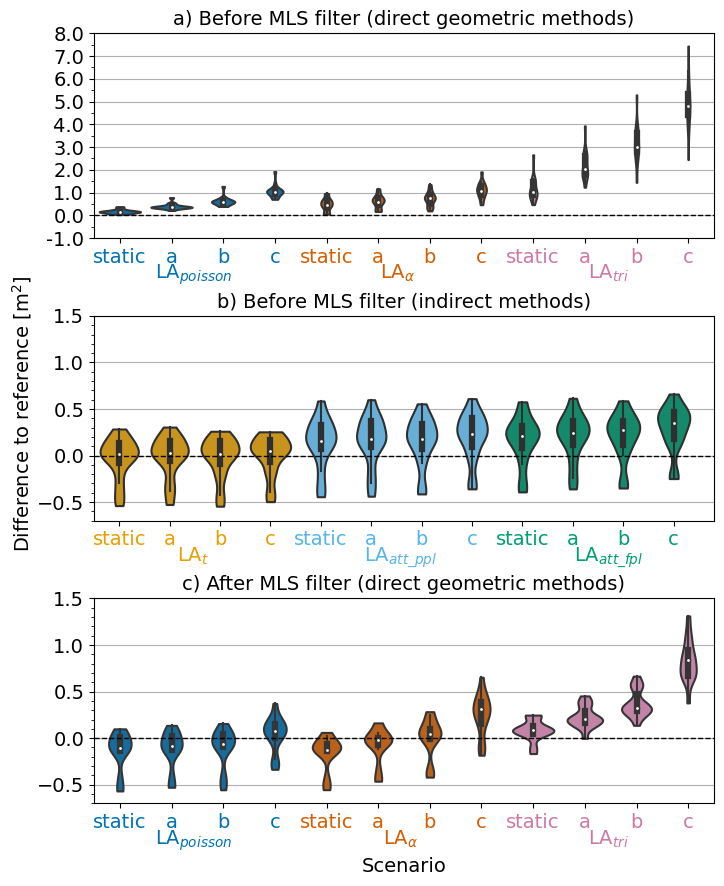

In [19]:
from matplotlib.ticker import FixedLocator, MultipleLocator

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 10))
ymin, ymax = [la_df[["alpha_la_diff", "tri_la_diff", "poisson_la_diff",
                    "alpha_la_mls_diff", "tri_la_mls_diff", "poisson_la_mls_diff"]].min().min(),
              la_df[["alpha_la_diff", "tri_la_diff", "poisson_la_diff",
                    "alpha_la_mls_diff", "tri_la_mls_diff", "poisson_la_mls_diff"]].max().max()]
colors = [okabe_ito[4], okabe_ito[4], okabe_ito[4], okabe_ito[4], 
          okabe_ito[5], okabe_ito[5], okabe_ito[5], okabe_ito[5], 
          okabe_ito[6], okabe_ito[6], okabe_ito[6], okabe_ito[6],
          okabe_ito[0], okabe_ito[0], okabe_ito[0], okabe_ito[0],
          okabe_ito[1], okabe_ito[1], okabe_ito[1], okabe_ito[1],
          okabe_ito[2], okabe_ito[2], okabe_ito[2], okabe_ito[2]]
bp = sns.violinplot([la_df_diffs_static["poisson_la_diff"],
                 la_df_diffs_a["poisson_la_diff"],
                 la_df_diffs_b["poisson_la_diff"],
                 la_df_diffs_c["poisson_la_diff"],
                 la_df_diffs_static["alpha_la_diff"],
                 la_df_diffs_a["alpha_la_diff"],
                 la_df_diffs_b["alpha_la_diff"],
                 la_df_diffs_c["alpha_la_diff"],
                 la_df_diffs_static["tri_la_diff"],
                 la_df_diffs_a["tri_la_diff"],
                 la_df_diffs_b["tri_la_diff"],
                 la_df_diffs_c["tri_la_diff"]], ax=ax1, palette=colors, bw=0.4, cut=0)
ax1.set_ylim(ymin-0.2, ymax+0.2)
ax2.set_ylim(-0.7, 1.5)
ax3.set_ylim(-0.7, 1.5)
ax1.hlines(0, 0, 1, transform=ax1.get_yaxis_transform(), colors='black', linestyles="dashed", lw=1)
ax1.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], labels=["static", "a", "b", "c", "static", "a", "b", "c", "static", "a", "b", "c"])
ax1.set_xlim(-0.5, 11.5)
for xtick, color in zip(ax1.get_xticklabels(), colors):
    xtick.set_color(color)
ax1.yaxis.grid(True)
ax1.text(0.16, -0.2, "LA$_{poisson}$", color=colors[0], ha="center", transform=ax1.transAxes)
ax1.text(0.49, -0.2,  r"LA$_{\alpha}$", color=colors[4], ha="center", transform=ax1.transAxes)
ax1.text(0.83, -0.2, "LA$_{tri}$", color=colors[8], ha="center", transform=ax1.transAxes)
ax1.set_title("a) Before MLS filter (direct geometric methods)")
ax1.yaxis.set_major_locator(FixedLocator(np.arange(-1.0, 7.5, 1.0)))
#ax1.set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0],
#              labels=["-1.0", "", "0.0", "", "1.0", "", "2.0", "", "3.0", "", "4.0", "", "5.0", "", "6.0", "", "7.0", "", "8.0"])
ax1.set_yticks([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0],
              labels=["-1.0", "0.0", "1.0", "2.0", "3.0", "4.0", "5.0", "6.0", "7.0", "8.0"])
ax1.yaxis.set_minor_locator(MultipleLocator(0.5))

ymin, ymax = [la_df[["alpha_la_mls_diff", "tri_la_mls_diff", "poisson_la_mls_diff"]].min().min(),
              la_df[["alpha_la_mls_diff", "tri_la_mls_diff", "poisson_la_mls_diff"]].max().max()]
bp = sns.violinplot([la_df_diffs_static["poisson_la_mls_diff"],
                 la_df_diffs_a["poisson_la_mls_diff"],
                 la_df_diffs_b["poisson_la_mls_diff"],
                 la_df_diffs_c["poisson_la_mls_diff"],
                 la_df_diffs_static["alpha_la_mls_diff"],
                 la_df_diffs_a["alpha_la_mls_diff"],
                 la_df_diffs_b["alpha_la_mls_diff"],
                 la_df_diffs_c["alpha_la_mls_diff"],
                 la_df_diffs_static["tri_la_mls_diff"],
                 la_df_diffs_a["tri_la_mls_diff"],
                 la_df_diffs_b["tri_la_mls_diff"],
                 la_df_diffs_c["tri_la_mls_diff"]
                 ], ax=ax3, palette=colors, bw=0.4, cut=0)
#ax2.set_ylim(ymin-0.3, ymax+0.2)
ax3.hlines(0, 0, 1, transform=ax3.get_yaxis_transform(), colors='black', linestyles="dashed", lw=1)
# ax2.set_xlabel("Scenario", labelpad=20)
ax3.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], labels=["static", "a", "b", "c", "static", "a", "b", "c", "static", "a", "b", "c"])
ax3.set_xlim(-0.5, 11.5)
for xtick, color in zip(ax3.get_xticklabels(), colors):
    xtick.set_color(color)
# ax2.set_ylabel("Difference to reference [m$^2$]")
ax3.yaxis.grid(True)
ax3.text(0.16, -0.2, "LA$_{poisson}$", color=colors[0], ha="center", transform=ax3.transAxes)
ax3.text(0.495, -0.2, r"LA$_{\alpha}$", color=colors[4], ha="center", transform=ax3.transAxes)
ax3.text(0.83, -0.2, "LA$_{tri}$", color=colors[8], ha="center", transform=ax3.transAxes)
ax3.set_title("c) After MLS filter (direct geometric methods)")
ax3.yaxis.set_minor_locator(MultipleLocator(0.1))

bp = sns.violinplot([la_df_amapvox_diffs_static["la_t_diff"],
                 la_df_amapvox_diffs_a["la_t_diff"],
                 la_df_amapvox_diffs_b["la_t_diff"],
                 la_df_amapvox_diffs_c["la_t_diff"],
                 la_df_amapvox_diffs_static["la_att_ppl_diff"],
                 la_df_amapvox_diffs_a["la_att_ppl_diff"],
                 la_df_amapvox_diffs_b["la_att_ppl_diff"],
                 la_df_amapvox_diffs_c["la_att_ppl_diff"],
                 la_df_amapvox_diffs_static["la_att_fpl_diff"],
                 la_df_amapvox_diffs_a["la_att_fpl_diff"],
                 la_df_amapvox_diffs_b["la_att_fpl_diff"],
                 la_df_amapvox_diffs_c["la_att_fpl_diff"]], ax=ax2, palette=colors[12:], bw=0.4, cut=0)
ax2.hlines(0, 0, 1, transform=ax2.get_yaxis_transform(), colors='black', linestyles="dashed", lw=1)
ax2.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], labels=["static", "a", "b", "c", "static", "a", "b", "c", "static", "a", "b", "c"])
ax2.set_xlim(-0.5, 11.8)
for xtick, color in zip(ax2.get_xticklabels(), colors[12:]):
    xtick.set_color(color)
ax2.yaxis.grid(True)
ax2.text(0.16, -0.2, "LA$_t$", color=colors[12], ha="center", transform=ax2.transAxes)
ax2.text(0.495, -0.2, r"LA$_{att\_ppl}$", color=colors[16], ha="center", transform=ax2.transAxes)
ax2.text(0.83, -0.2, r"LA$_{att\_fpl}$", color=colors[20], ha="center", transform=ax2.transAxes)
ax3.set_xlabel("Scenario", labelpad=18)
ax2.set_title("b) Before MLS filter (indirect methods)")
ax2.yaxis.set_minor_locator(MultipleLocator(0.1))

plt.text(0.02, 0.5, "Difference to reference [m$^2$]", fontsize=14, rotation="vertical", va="center", transform=fig.transFigure)

# plt.tight_layout()
fig.subplots_adjust(hspace=0.38)
plt.savefig(plot_dir / "la_by_method.png", dpi=dpi, bbox_inches='tight')
plt.show()

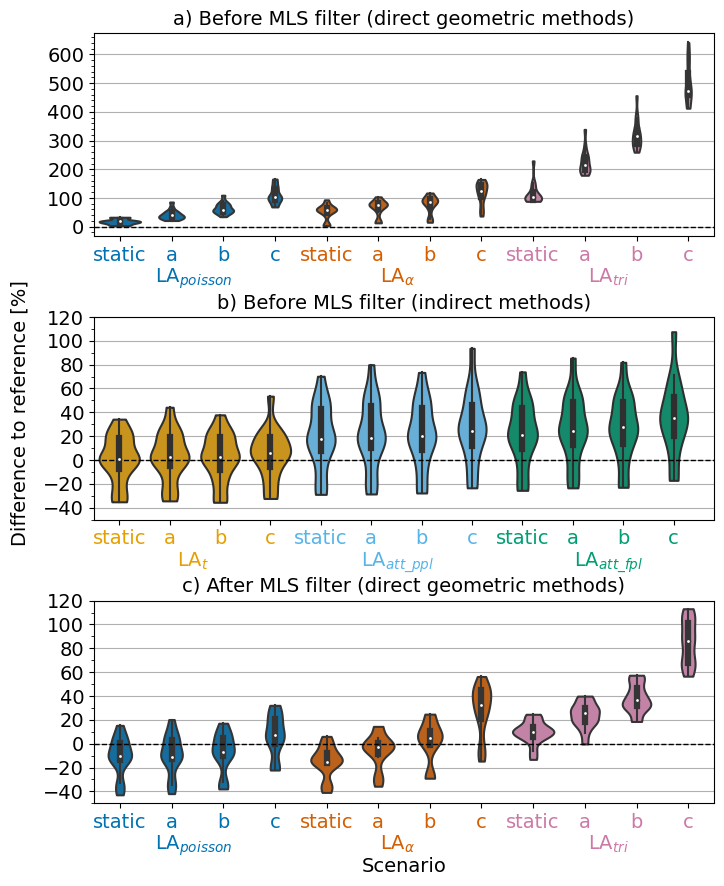

In [20]:
from matplotlib.ticker import FixedLocator, MultipleLocator

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 10))
ymin, ymax = [la_df[["alpha_la_diff_rel", "tri_la_diff_rel", "poisson_la_diff_rel",
                    "alpha_la_mls_diff_rel", "tri_la_mls_diff_rel", "poisson_la_mls_diff_rel"]].min().min(),
              la_df[["alpha_la_diff_rel", "tri_la_diff_rel", "poisson_la_diff_rel",
                    "alpha_la_mls_diff_rel", "tri_la_mls_diff_rel", "poisson_la_mls_diff_rel"]].max().max()]
colors = [okabe_ito[4], okabe_ito[4], okabe_ito[4], okabe_ito[4], 
          okabe_ito[5], okabe_ito[5], okabe_ito[5], okabe_ito[5], 
          okabe_ito[6], okabe_ito[6], okabe_ito[6], okabe_ito[6],
          okabe_ito[0], okabe_ito[0], okabe_ito[0], okabe_ito[0],
          okabe_ito[1], okabe_ito[1], okabe_ito[1], okabe_ito[1],
          okabe_ito[2], okabe_ito[2], okabe_ito[2], okabe_ito[2]]
bp = sns.violinplot([la_df_rel_diffs_static["poisson_la_diff_rel"],
                 la_df_rel_diffs_a["poisson_la_diff_rel"],
                 la_df_rel_diffs_b["poisson_la_diff_rel"],
                 la_df_rel_diffs_c["poisson_la_diff_rel"],
                 la_df_rel_diffs_static["alpha_la_diff_rel"],
                 la_df_rel_diffs_a["alpha_la_diff_rel"],
                 la_df_rel_diffs_b["alpha_la_diff_rel"],
                 la_df_rel_diffs_c["alpha_la_diff_rel"],
                 la_df_rel_diffs_static["tri_la_diff_rel"],
                 la_df_rel_diffs_a["tri_la_diff_rel"],
                 la_df_rel_diffs_b["tri_la_diff_rel"],
                 la_df_rel_diffs_c["tri_la_diff_rel"]], ax=ax1, palette=colors, bw=0.4, cut=0)
#ax1.set_ylim(ymin-0.2, ymax+0.2)
ax2.set_ylim(-50, 120)
ax3.set_ylim(-50, 120)
ax1.hlines(0, 0, 1, transform=ax1.get_yaxis_transform(), colors='black', linestyles="dashed", lw=1)
ax1.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], labels=["static", "a", "b", "c", "static", "a", "b", "c", "static", "a", "b", "c"])
ax1.set_xlim(-0.5, 11.5)
for xtick, color in zip(ax1.get_xticklabels(), colors):
    xtick.set_color(color)
ax1.yaxis.grid(True)
ax1.text(0.16, -0.23, "LA$_{poisson}$", color=colors[0], ha="center", transform=ax1.transAxes)
ax1.text(0.49, -0.23,  r"LA$_{\alpha}$", color=colors[4], ha="center", transform=ax1.transAxes)
ax1.text(0.83, -0.23, "LA$_{tri}$", color=colors[8], ha="center", transform=ax1.transAxes)
ax1.set_title("a) Before MLS filter (direct geometric methods)")
ax1.yaxis.set_major_locator(MultipleLocator(100))
ax1.yaxis.set_minor_locator(MultipleLocator(20))
#ax1.set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0],
#              labels=["-1.0", "", "0.0", "", "1.0", "", "2.0", "", "3.0", "", "4.0", "", "5.0", "", "6.0", "", "7.0", "", "8.0"])

ymin, ymax = [la_df[["alpha_la_mls_diff", "tri_la_mls_diff", "poisson_la_mls_diff"]].min().min(),
              la_df[["alpha_la_mls_diff", "tri_la_mls_diff", "poisson_la_mls_diff"]].max().max()]
bp = sns.violinplot([la_df_rel_diffs_static["poisson_la_mls_diff_rel"],
                 la_df_rel_diffs_a["poisson_la_mls_diff_rel"],
                 la_df_rel_diffs_b["poisson_la_mls_diff_rel"],
                 la_df_rel_diffs_c["poisson_la_mls_diff_rel"],
                 la_df_rel_diffs_static["alpha_la_mls_diff_rel"],
                 la_df_rel_diffs_a["alpha_la_mls_diff_rel"],
                 la_df_rel_diffs_b["alpha_la_mls_diff_rel"],
                 la_df_rel_diffs_c["alpha_la_mls_diff_rel"],
                 la_df_rel_diffs_static["tri_la_mls_diff_rel"],
                 la_df_rel_diffs_a["tri_la_mls_diff_rel"],
                 la_df_rel_diffs_b["tri_la_mls_diff_rel"],
                 la_df_rel_diffs_c["tri_la_mls_diff_rel"]
                 ], ax=ax3, palette=colors, bw=0.4, cut=0)
#ax2.set_ylim(ymin-0.3, ymax+0.2)
ax3.hlines(0, 0, 1, transform=ax3.get_yaxis_transform(), colors='black', linestyles="dashed", lw=1)
# ax2.set_xlabel("Scenario", labelpad=20)
ax3.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], labels=["static", "a", "b", "c", "static", "a", "b", "c", "static", "a", "b", "c"])
ax3.set_xlim(-0.5, 11.5)
for xtick, color in zip(ax3.get_xticklabels(), colors):
    xtick.set_color(color)
# ax2.set_ylabel("Difference to reference [m$^2$]")
ax3.yaxis.grid(True)
ax3.text(0.16, -0.23, "LA$_{poisson}$", color=colors[0], ha="center", transform=ax3.transAxes)
ax3.text(0.49, -0.23, r"LA$_{\alpha}$", color=colors[4], ha="center", transform=ax3.transAxes)
ax3.text(0.83, -0.23, "LA$_{tri}$", color=colors[8], ha="center", transform=ax3.transAxes)
ax3.set_title("c) After MLS filter (direct geometric methods)")
ax2.yaxis.set_major_locator(MultipleLocator(20))
ax2.yaxis.set_minor_locator(MultipleLocator(10))

bp = sns.violinplot([la_df_amapvox_rel_diffs_static["la_t_diff_rel"],
                 la_df_amapvox_rel_diffs_a["la_t_diff_rel"],
                 la_df_amapvox_rel_diffs_b["la_t_diff_rel"],
                 la_df_amapvox_rel_diffs_c["la_t_diff_rel"],
                 la_df_amapvox_rel_diffs_static["la_att_ppl_diff_rel"],
                 la_df_amapvox_rel_diffs_a["la_att_ppl_diff_rel"],
                 la_df_amapvox_rel_diffs_b["la_att_ppl_diff_rel"],
                 la_df_amapvox_rel_diffs_c["la_att_ppl_diff_rel"],
                 la_df_amapvox_rel_diffs_static["la_att_fpl_diff_rel"],
                 la_df_amapvox_rel_diffs_a["la_att_fpl_diff_rel"],
                 la_df_amapvox_rel_diffs_b["la_att_fpl_diff_rel"],
                 la_df_amapvox_rel_diffs_c["la_att_fpl_diff_rel"]], ax=ax2, palette=colors[12:], bw=0.4, cut=0)
ax2.hlines(0, 0, 1, transform=ax2.get_yaxis_transform(), colors='black', linestyles="dashed", lw=1)
ax2.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], labels=["static", "a", "b", "c", "static", "a", "b", "c", "static", "a", "b", "c"])
ax2.set_xlim(-0.5, 11.8)
for xtick, color in zip(ax2.get_xticklabels(), colors[12:]):
    xtick.set_color(color)
ax2.yaxis.grid(True)
ax2.text(0.16, -0.23, "LA$_t$", color=colors[12], ha="center", transform=ax2.transAxes)
ax2.text(0.49, -0.23, r"LA$_{att\_ppl}$", color=colors[16], ha="center", transform=ax2.transAxes)
ax2.text(0.83, -0.23, r"LA$_{att\_fpl}$", color=colors[20], ha="center", transform=ax2.transAxes)
ax3.set_xlabel("Scenario", labelpad=18)
ax2.set_title("b) Before MLS filter (indirect methods)")
ax3.yaxis.set_major_locator(MultipleLocator(20))
ax3.yaxis.set_minor_locator(MultipleLocator(10))

plt.text(0.02, 0.5, "Difference to reference [%]", fontsize=14, rotation="vertical", va="center", transform=fig.transFigure)

# plt.tight_layout()
fig.subplots_adjust(hspace=0.4)
plt.savefig(plot_dir / "la_by_method_rel.png", dpi=dpi, bbox_inches='tight')
plt.show()

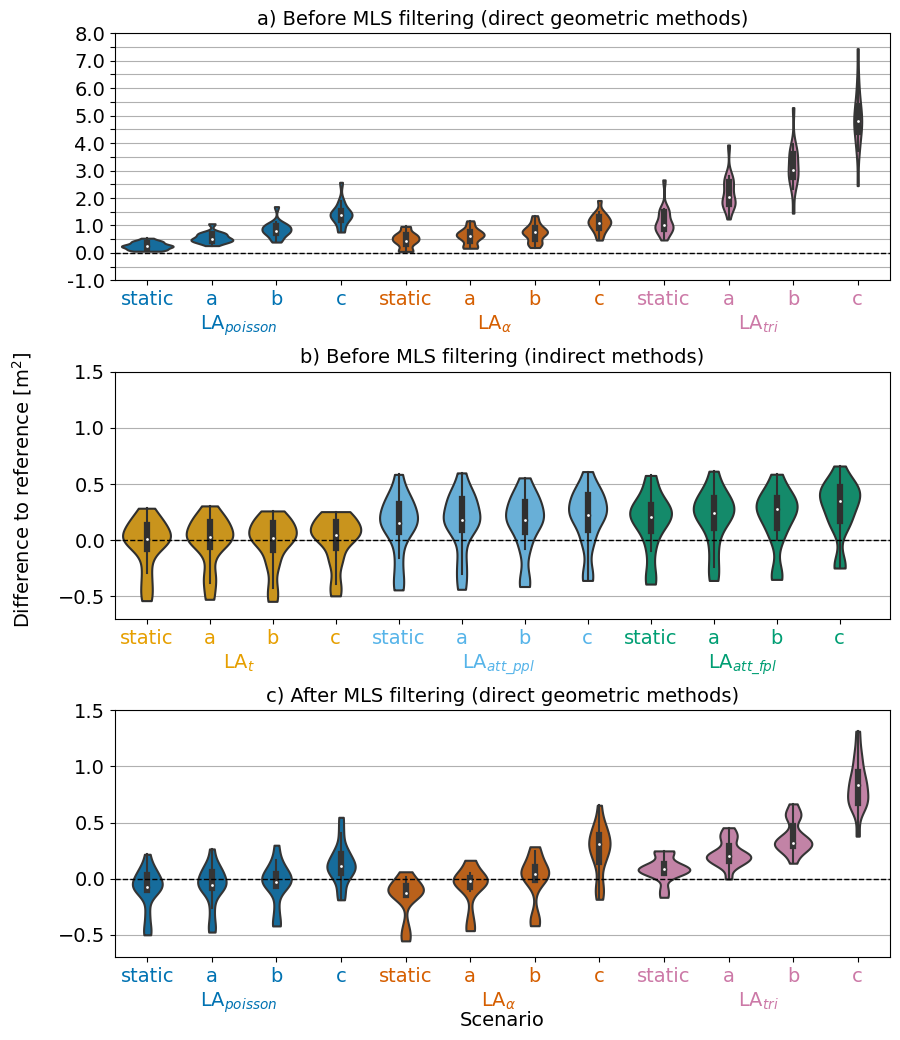

In [21]:
from matplotlib.ticker import FixedLocator

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))
ymin, ymax = [la_df[["alpha_la_diff", "tri_la_diff", "poisson_la_diff",
                    "alpha_la_mls_diff", "tri_la_mls_diff", "poisson_la_mls_diff"]].min().min(),
              la_df[["alpha_la_diff", "tri_la_diff", "poisson_la_diff",
                    "alpha_la_mls_diff", "tri_la_mls_diff", "poisson_la_mls_diff"]].max().max()]
colors = [okabe_ito[4], okabe_ito[4], okabe_ito[4], okabe_ito[4], 
          okabe_ito[5], okabe_ito[5], okabe_ito[5], okabe_ito[5], 
          okabe_ito[6], okabe_ito[6], okabe_ito[6], okabe_ito[6],
          okabe_ito[0], okabe_ito[0], okabe_ito[0], okabe_ito[0],
          okabe_ito[1], okabe_ito[1], okabe_ito[1], okabe_ito[1],
          okabe_ito[2], okabe_ito[2], okabe_ito[2], okabe_ito[2]]
bp = sns.violinplot([la_df_diffs_static["poisson_la_fixedthresh_diff"],
                 la_df_diffs_a["poisson_la_fixedthresh_diff"],
                 la_df_diffs_b["poisson_la_fixedthresh_diff"],
                 la_df_diffs_c["poisson_la_fixedthresh_diff"],
                 la_df_diffs_static["alpha_la_diff"],
                 la_df_diffs_a["alpha_la_diff"],
                 la_df_diffs_b["alpha_la_diff"],
                 la_df_diffs_c["alpha_la_diff"],
                 la_df_diffs_static["tri_la_diff"],
                 la_df_diffs_a["tri_la_diff"],
                 la_df_diffs_b["tri_la_diff"],
                 la_df_diffs_c["tri_la_diff"]], ax=ax1, palette=colors, bw=0.4, cut=0)
ax1.set_ylim(ymin-0.2, ymax+0.2)
ax2.set_ylim(-0.7, 1.5)
ax3.set_ylim(-0.7, 1.5)
ax1.hlines(0, 0, 1, transform=ax1.get_yaxis_transform(), colors='black', linestyles="dashed", lw=1)
ax1.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], labels=["static", "a", "b", "c", "static", "a", "b", "c", "static", "a", "b", "c"])
ax1.set_xlim(-0.5, 11.5)
for xtick, color in zip(ax1.get_xticklabels(), colors):
    xtick.set_color(color)
ax1.yaxis.grid(True)
ax1.text(0.16, -0.2, "LA$_{poisson}$", color=colors[0], ha="center", transform=ax1.transAxes)
ax1.text(0.49, -0.2,  r"LA$_{\alpha}$", color=colors[4], ha="center", transform=ax1.transAxes)
ax1.text(0.83, -0.2, "LA$_{tri}$", color=colors[8], ha="center", transform=ax1.transAxes)
ax1.set_title("a) Before MLS filtering (direct geometric methods)")
ax1.yaxis.set_major_locator(FixedLocator(np.arange(-1.0, 7.5, 0.5)))
ax1.set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0],
              labels=["-1.0", "", "0.0", "", "1.0", "", "2.0", "", "3.0", "", "4.0", "", "5.0", "", "6.0", "", "7.0", "", "8.0"])

ymin, ymax = [la_df[["alpha_la_mls_diff", "tri_la_mls_diff", "poisson_la_mls_diff"]].min().min(),
              la_df[["alpha_la_mls_diff", "tri_la_mls_diff", "poisson_la_mls_diff"]].max().max()]
bp = sns.violinplot([la_df_diffs_static["poisson_la_mls_fixedthresh_diff"],
                 la_df_diffs_a["poisson_la_mls_fixedthresh_diff"],
                 la_df_diffs_b["poisson_la_mls_fixedthresh_diff"],
                 la_df_diffs_c["poisson_la_mls_fixedthresh_diff"],
                 la_df_diffs_static["alpha_la_mls_diff"],
                 la_df_diffs_a["alpha_la_mls_diff"],
                 la_df_diffs_b["alpha_la_mls_diff"],
                 la_df_diffs_c["alpha_la_mls_diff"],
                 la_df_diffs_static["tri_la_mls_diff"],
                 la_df_diffs_a["tri_la_mls_diff"],
                 la_df_diffs_b["tri_la_mls_diff"],
                 la_df_diffs_c["tri_la_mls_diff"]
                 ], ax=ax3, palette=colors, bw=0.4, cut=0)
#ax2.set_ylim(ymin-0.3, ymax+0.2)
ax3.hlines(0, 0, 1, transform=ax3.get_yaxis_transform(), colors='black', linestyles="dashed", lw=1)
# ax2.set_xlabel("Scenario", labelpad=20)
ax3.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], labels=["static", "a", "b", "c", "static", "a", "b", "c", "static", "a", "b", "c"])
ax3.set_xlim(-0.5, 11.5)
for xtick, color in zip(ax3.get_xticklabels(), colors):
    xtick.set_color(color)
# ax2.set_ylabel("Difference to reference [m$^2$]")
ax3.yaxis.grid(True)
ax3.text(0.16, -0.2, "LA$_{poisson}$", color=colors[0], ha="center", transform=ax3.transAxes)
ax3.text(0.495, -0.2, r"LA$_{\alpha}$", color=colors[4], ha="center", transform=ax3.transAxes)
ax3.text(0.83, -0.2, "LA$_{tri}$", color=colors[8], ha="center", transform=ax3.transAxes)
ax3.set_title("c) After MLS filtering (direct geometric methods)")

bp = sns.violinplot([la_df_amapvox_diffs_static["la_t_diff"],
                 la_df_amapvox_diffs_a["la_t_diff"],
                 la_df_amapvox_diffs_b["la_t_diff"],
                 la_df_amapvox_diffs_c["la_t_diff"],
                 la_df_amapvox_diffs_static["la_att_ppl_diff"],
                 la_df_amapvox_diffs_a["la_att_ppl_diff"],
                 la_df_amapvox_diffs_b["la_att_ppl_diff"],
                 la_df_amapvox_diffs_c["la_att_ppl_diff"],
                 la_df_amapvox_diffs_static["la_att_fpl_diff"],
                 la_df_amapvox_diffs_a["la_att_fpl_diff"],
                 la_df_amapvox_diffs_b["la_att_fpl_diff"],
                 la_df_amapvox_diffs_c["la_att_fpl_diff"]], ax=ax2, palette=colors[12:], bw=0.4, cut=0)
ax2.hlines(0, 0, 1, transform=ax2.get_yaxis_transform(), colors='black', linestyles="dashed", lw=1)
ax2.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], labels=["static", "a", "b", "c", "static", "a", "b", "c", "static", "a", "b", "c"])
ax2.set_xlim(-0.5, 11.8)
for xtick, color in zip(ax2.get_xticklabels(), colors[12:]):
    xtick.set_color(color)
ax2.yaxis.grid(True)
ax2.text(0.16, -0.2, "LA$_t$", color=colors[12], ha="center", transform=ax2.transAxes)
ax2.text(0.495, -0.2, r"LA$_{att\_ppl}$", color=colors[16], ha="center", transform=ax2.transAxes)
ax2.text(0.81, -0.2, r"LA$_{att\_fpl}$", color=colors[20], ha="center", transform=ax2.transAxes)
ax3.set_xlabel("Scenario", labelpad=18)
ax2.set_title("b) Before MLS filtering (indirect methods)")

plt.text(0.02, 0.5, "Difference to reference [m$^2$]", fontsize=14, rotation="vertical", va="center", transform=fig.transFigure)

# plt.tight_layout()
fig.subplots_adjust(hspace=0.37)
# plt.savefig(plot_dir / "la_by_method.png", dpi=dpi, bbox_inches='tight')
plt.show()

### ULS

In [22]:
la_df_uls = pd.read_csv(Path(metric_folder) / uls_la_amapvox, sep=" ")
la_df_uls = pd.merge(la_df_uls.reset_index(), la_ref_df, on=["tree_id"]).set_index(["scenario", "tree_id"])
la_df_uls["la_t_diff"] = (la_df_uls["la_t"] - la_df_uls["leaf_area"])
la_df_uls["la_att_fpl_diff"] = (la_df_uls["la_att_fpl"] - la_df_uls["leaf_area"])
la_df_uls["la_att_ppl_diff"] = (la_df_uls["la_att_ppl"] - la_df_uls["leaf_area"])
la_df_uls_diffs_static = la_df_uls.loc["static", ["la_t_diff", "la_att_fpl_diff", "la_att_ppl_diff"]]
la_df_uls_diffs_a = la_df_uls.loc["a", ["la_t_diff", "la_att_fpl_diff", "la_att_ppl_diff"]]
la_df_uls_diffs_b = la_df_uls.loc["b", ["la_t_diff", "la_att_fpl_diff", "la_att_ppl_diff"]]
la_df_uls_diffs_c = la_df_uls.loc["c", ["la_t_diff", "la_att_fpl_diff", "la_att_ppl_diff"]]

In [23]:
la_df_uls["la_t_diff_rel"] = (la_df_uls["la_t"] - la_df_uls["leaf_area"]) / la_df_uls["leaf_area"] * 100
la_df_uls["la_att_fpl_diff_rel"] = (la_df_uls["la_att_fpl"] - la_df_uls["leaf_area"]) / la_df_uls["leaf_area"] * 100
la_df_uls["la_att_ppl_diff_rel"] = (la_df_uls["la_att_ppl"] - la_df_uls["leaf_area"]) / la_df_uls["leaf_area"] * 100
la_df_uls_diffs_rel_static = la_df_uls.loc["static", ["la_t_diff_rel", "la_att_fpl_diff_rel", "la_att_ppl_diff_rel"]]
la_df_uls_diffs_rel_a = la_df_uls.loc["a", ["la_t_diff_rel", "la_att_fpl_diff_rel", "la_att_ppl_diff_rel"]]
la_df_uls_diffs_rel_b = la_df_uls.loc["b", ["la_t_diff_rel", "la_att_fpl_diff_rel", "la_att_ppl_diff_rel"]]
la_df_uls_diffs_rel_c = la_df_uls.loc["c", ["la_t_diff_rel", "la_att_fpl_diff_rel", "la_att_ppl_diff_rel"]]

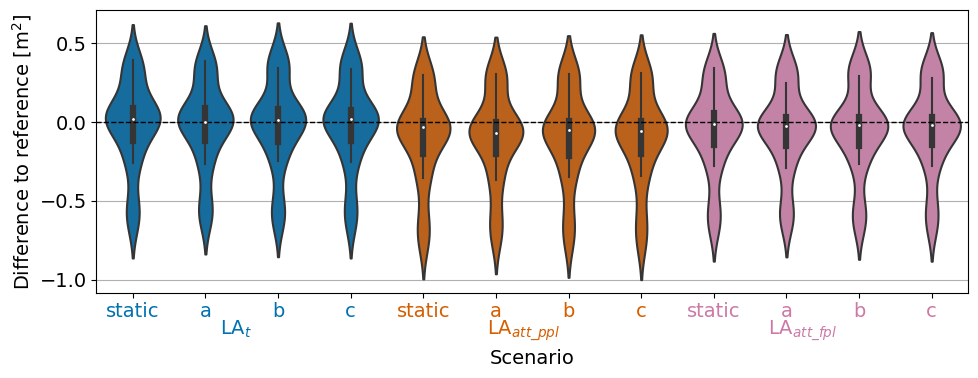

In [24]:
fig, ax = plt.subplots(figsize=(10, 4))
colors = [okabe_ito[4], okabe_ito[4], okabe_ito[4], okabe_ito[4], okabe_ito[5], okabe_ito[5], okabe_ito[5], okabe_ito[5], okabe_ito[6], okabe_ito[6], okabe_ito[6], okabe_ito[6]]
bp = sns.violinplot([la_df_uls_diffs_static["la_t_diff"],
                 la_df_uls_diffs_a["la_t_diff"],
                 la_df_uls_diffs_b["la_t_diff"],
                 la_df_uls_diffs_c["la_t_diff"],
                 la_df_uls_diffs_static["la_att_ppl_diff"],
                 la_df_uls_diffs_a["la_att_ppl_diff"],
                 la_df_uls_diffs_b["la_att_ppl_diff"],
                 la_df_uls_diffs_c["la_att_ppl_diff"],
                 la_df_uls_diffs_static["la_att_fpl_diff"],
                 la_df_uls_diffs_a["la_att_fpl_diff"],
                 la_df_uls_diffs_b["la_att_fpl_diff"],
                 la_df_uls_diffs_c["la_att_fpl_diff"]], ax=ax, palette=colors, bw=0.4) #, cut=0)
ax.hlines(0, 0, 1, transform=ax.get_yaxis_transform(), colors='black', linestyles="dashed", lw=1)
ax.set_xlabel("Scenario", labelpad=20)
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], labels=["static", "a", "b", "c", "static", "a", "b", "c", "static", "a", "b", "c"])
ax.set_xlim(-0.5, 11.5)
for xtick, color in zip(ax.get_xticklabels(), colors):
    xtick.set_color(color)
ax.set_ylabel("Difference to reference [m$^2$]")
ax.yaxis.grid(True)
ax.text(0.16, -0.15, "LA$_t$", color=colors[0], ha="center", transform=ax.transAxes)
ax.text(0.49, -0.15, r"LA$_{att\_ppl}$", color=colors[4], ha="center", transform=ax.transAxes)
ax.text(0.81, -0.15, r"LA$_{att\_fpl}$", color=colors[8], ha="center", transform=ax.transAxes)
plt.tight_layout()
plt.savefig(plot_dir / "la_amapvox_uls.png", dpi=dpi, bbox_inches='tight')
plt.show()

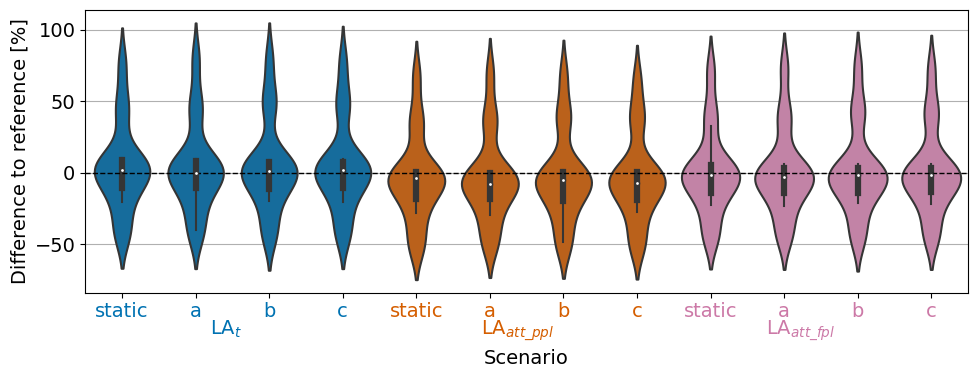

In [25]:
fig, ax = plt.subplots(figsize=(10, 4))
colors = [okabe_ito[4], okabe_ito[4], okabe_ito[4], okabe_ito[4], okabe_ito[5], okabe_ito[5], okabe_ito[5], okabe_ito[5], okabe_ito[6], okabe_ito[6], okabe_ito[6], okabe_ito[6]]
bp = sns.violinplot([la_df_uls_diffs_rel_static["la_t_diff_rel"],
                 la_df_uls_diffs_rel_a["la_t_diff_rel"],
                 la_df_uls_diffs_rel_b["la_t_diff_rel"],
                 la_df_uls_diffs_rel_c["la_t_diff_rel"],
                 la_df_uls_diffs_rel_static["la_att_ppl_diff_rel"],
                 la_df_uls_diffs_rel_a["la_att_ppl_diff_rel"],
                 la_df_uls_diffs_rel_b["la_att_ppl_diff_rel"],
                 la_df_uls_diffs_rel_c["la_att_ppl_diff_rel"],
                 la_df_uls_diffs_rel_static["la_att_fpl_diff_rel"],
                 la_df_uls_diffs_rel_a["la_att_fpl_diff_rel"],
                 la_df_uls_diffs_rel_b["la_att_fpl_diff_rel"],
                 la_df_uls_diffs_rel_c["la_att_fpl_diff_rel"]], ax=ax, palette=colors, bw=0.4) #, cut=0)
ax.hlines(0, 0, 1, transform=ax.get_yaxis_transform(), colors='black', linestyles="dashed", lw=1)
ax.set_xlabel("Scenario", labelpad=20)
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], labels=["static", "a", "b", "c", "static", "a", "b", "c", "static", "a", "b", "c"])
ax.set_xlim(-0.5, 11.5)
for xtick, color in zip(ax.get_xticklabels(), colors):
    xtick.set_color(color)
ax.set_ylabel("Difference to reference [%]")
ax.yaxis.grid(True)
ax.text(0.16, -0.15, "LA$_t$", color=colors[0], ha="center", transform=ax.transAxes)
ax.text(0.49, -0.15, r"LA$_{att\_ppl}$", color=colors[4], ha="center", transform=ax.transAxes)
ax.text(0.81, -0.15, r"LA$_{att\_fpl}$", color=colors[8], ha="center", transform=ax.transAxes)
plt.tight_layout()
plt.savefig(plot_dir / "la_amapvox_uls_rel.png", dpi=dpi, bbox_inches='tight')
plt.show()

## Geometric features (only TLS)

In [26]:
gf_dir = Path(metric_folder) / "geomfeats"
# pre mls
a_vs1 = list(Path(gf_dir).glob("a_*_1_gf.pkl"))
a_vs5 = list(Path(gf_dir).glob("a_*_5_gf.pkl"))
b_vs1 = list(Path(gf_dir).glob("b_*_1_gf.pkl"))
b_vs5 = list(Path(gf_dir).glob("b_*_5_gf.pkl"))
c_vs1 = list(Path(gf_dir).glob("c_*_1_gf.pkl"))
c_vs5 = list(Path(gf_dir).glob("c_*_5_gf.pkl"))
static_vs1 = list(Path(gf_dir).glob("static_*_1_gf.pkl"))
static_vs5 = list(Path(gf_dir).glob("static_*_5_gf.pkl"))

# wood
wood_static_vs1 = list(Path(gf_dir).glob("static_*_1_wood_gf.pkl"))
wood_static_vs5 = list(Path(gf_dir).glob("static_*_5_wood_gf.pkl"))

# post mls
a_vs1_mls = list(Path(gf_dir).glob("a_*_1_gf_mls.pkl"))
a_vs5_mls = list(Path(gf_dir).glob("a_*_5_gf_mls.pkl"))
b_vs1_mls = list(Path(gf_dir).glob("b_*_1_gf_mls.pkl"))
b_vs5_mls = list(Path(gf_dir).glob("b_*_5_gf_mls.pkl"))
c_vs1_mls = list(Path(gf_dir).glob("c_*_1_gf_mls.pkl"))
c_vs5_mls = list(Path(gf_dir).glob("c_*_5_gf_mls.pkl"))
static_vs1_mls = list(Path(gf_dir).glob("static_*_1_gf_mls.pkl"))
static_vs5_mls = list(Path(gf_dir).glob("static_*_5_gf_mls.pkl"))

def create_geomfeats_df_dict(combinations, names):
    df_dict = {}
    for combo, name in zip(combinations, names):
        all_dfs = []
        n_trees = len(combo)
        for f in combo:
            df = pd.read_pickle(f)
            all_dfs.append(df)
        df_dict[name] = pd.concat(all_dfs, ignore_index=True)

    return df_dict

In [27]:
names_l = ["a_vs1", "a_vs5", "b_vs1", "b_vs5", "c_vs1", "c_vs5", "static_vs1", "static_vs5"]
merged_df_dict = create_geomfeats_df_dict(combinations=[a_vs1, a_vs5, b_vs1, b_vs5,
                                                        c_vs1, c_vs5, static_vs1, static_vs5],
                                          names=names_l)
merged_mls_df_dict = create_geomfeats_df_dict(combinations = [a_vs1_mls, a_vs5_mls, b_vs1_mls, b_vs5_mls,
                                                              c_vs1_mls, c_vs5_mls, static_vs1_mls, static_vs5_mls],
                                              names=names_l)
names_w = ["wood_static_vs1", "wood_static_vs5"]
merged_wood_df_dict = create_geomfeats_df_dict(combinations=[wood_static_vs1, wood_static_vs5],
                                               names=names_w)

In [28]:
from matplotlib.gridspec import SubplotSpec

def create_subtitle(fig: plt.Figure, grid: SubplotSpec, title: str, fontweight="normal", y: float = 1.0):
    "Sign sets of subplots with title"
    row = fig.add_subplot(grid)
    # the '\n' is important
    row.set_title(f'{title}\n', fontweight=fontweight, y=y)
    # hide subplot
    row.set_frame_on(False)
    row.axis('off')

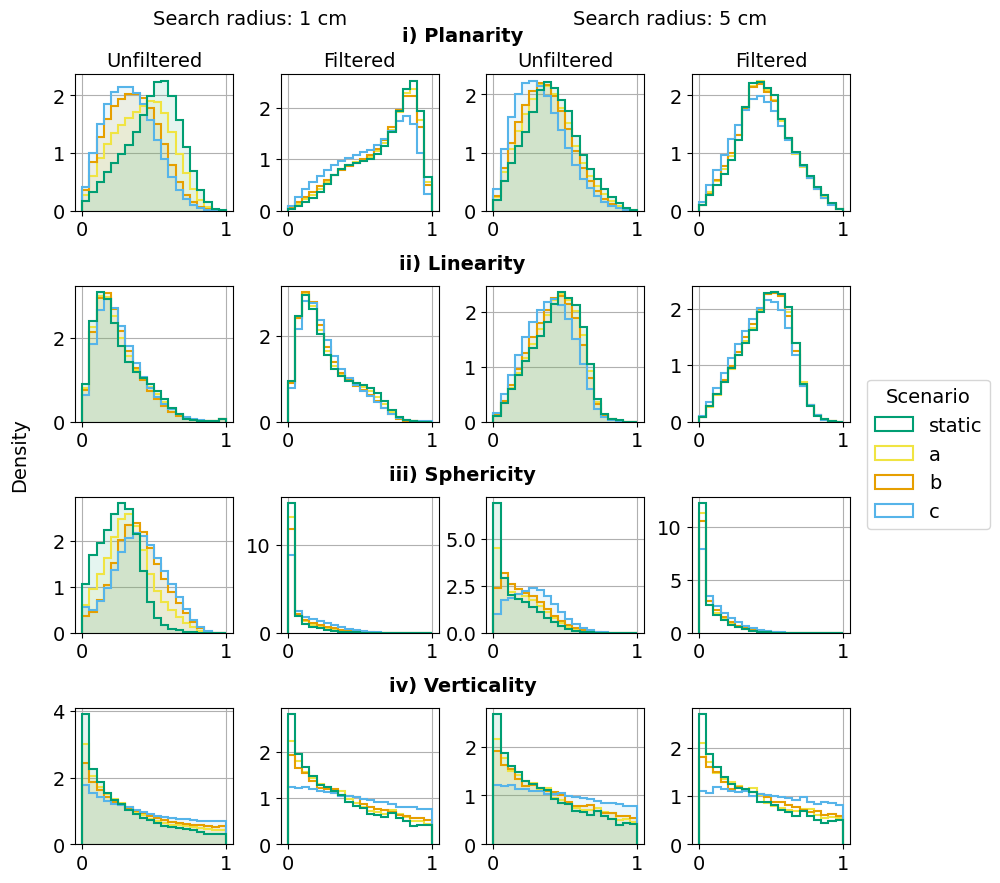

In [29]:
fig_rows = 4
fig_cols = 4
fig, axs = plt.subplots(fig_rows, fig_cols, figsize=(10, 10))
new_order = [3, 0, 1, 2]
colors = [okabe_ito[idx] for idx in new_order]
n_trees = len(a_vs1)
for row_idx, key in enumerate(merged_df_dict["a_vs1"].columns):
    for vs, size, col_idx in zip(["vs1", "vs5"], [1, 5], [0, 2]):
        subnames = [n for n in names_l if vs in n]
        for i, name in enumerate(subnames):
            scenario = name.split("_")[0]
            # Get the frequencies of the combined histogram
            hist, bins = np.histogram(merged_df_dict[name][key], range=(0, 1), bins=20)
            # Normalize by number of trees
            hist_norm = hist / n_trees
            # plot
            axs[row_idx, col_idx].hist(bins[:-1], bins, weights=hist_norm, label=scenario, histtype="stepfilled", color=colors[i], lw=1.5, density=True, alpha=0.1)
            axs[row_idx, col_idx].hist(bins[:-1], bins, weights=hist_norm, label=scenario, histtype="step", color=colors[i], lw=1.5, density=True)

        axs[row_idx, col_idx].grid()
axs[0, 0].set_title(f"Unfiltered")
axs[0, 1].set_title(f"Filtered")
axs[0, 2].set_title(f"Unfiltered")
axs[0, 3].set_title(f"Filtered")
plt.text(0.3, 0.93, "Search radius: 1 cm", fontsize=14, ha="center", transform=fig.transFigure)
grid = plt.GridSpec(fig_rows, fig_cols)
#fig.subplots_adjust(hspace=0.25, wspace=0.25)
for row_idx, key in enumerate(merged_mls_df_dict["a_vs1"].columns):
    for vs, size, col_idx in zip(["vs1", "vs5"], [1, 5], [1, 3]):
        subnames = [n for n in names_l if vs in n]
        for i, name in enumerate(subnames):
            scenario = name.split("_")[0]
            # Get the frequencies of the combined histogram
            hist, bins = np.histogram(merged_mls_df_dict[name][key], range=(0, 1), bins=20)
            # Normalize by number of trees
            hist_norm = hist / n_trees
            # plot
            axs[row_idx, col_idx].hist(bins[:-1], bins, weights=hist_norm, label=scenario, histtype="step", color=colors[i], lw=1.5, density=True)
        axs[row_idx, col_idx].grid()
        handles, labels = axs[row_idx, col_idx].get_legend_handles_labels()
axs[row_idx, col_idx].legend(handles=[handles[i] for i in new_order], labels=[labels[i] for i in new_order],
                             loc="center right", bbox_to_anchor=(1.05,0.5), bbox_transform=fig.transFigure,
                            title="Scenario")
plt.text(0.72, 0.93, "Search radius: 5 cm", fontsize=14, ha="center", transform=fig.transFigure)
create_subtitle(fig, grid[0, ::], f"i) {merged_mls_df_dict[name].columns[0].capitalize()}", fontweight="semibold", y= 1.02)
create_subtitle(fig, grid[1, ::], f"ii) {merged_mls_df_dict[name].columns[1].capitalize()}", fontweight="semibold", y=0.9)
create_subtitle(fig, grid[2, ::], f"iii) {merged_mls_df_dict[name].columns[2].capitalize()}", fontweight="semibold", y=0.9)
create_subtitle(fig, grid[3, ::], f"iv) {merged_mls_df_dict[name].columns[3].capitalize()}", fontweight="semibold", y=0.9)
fig.subplots_adjust(hspace=0.55, wspace=0.3)
plt.text(0.06, 0.5, "Density", fontsize=14, rotation="vertical", va="center", transform=fig.transFigure)
plt.savefig(plot_dir / "geomfeats_histo_all.png", dpi=dpi, bbox_inches='tight')
plt.show()

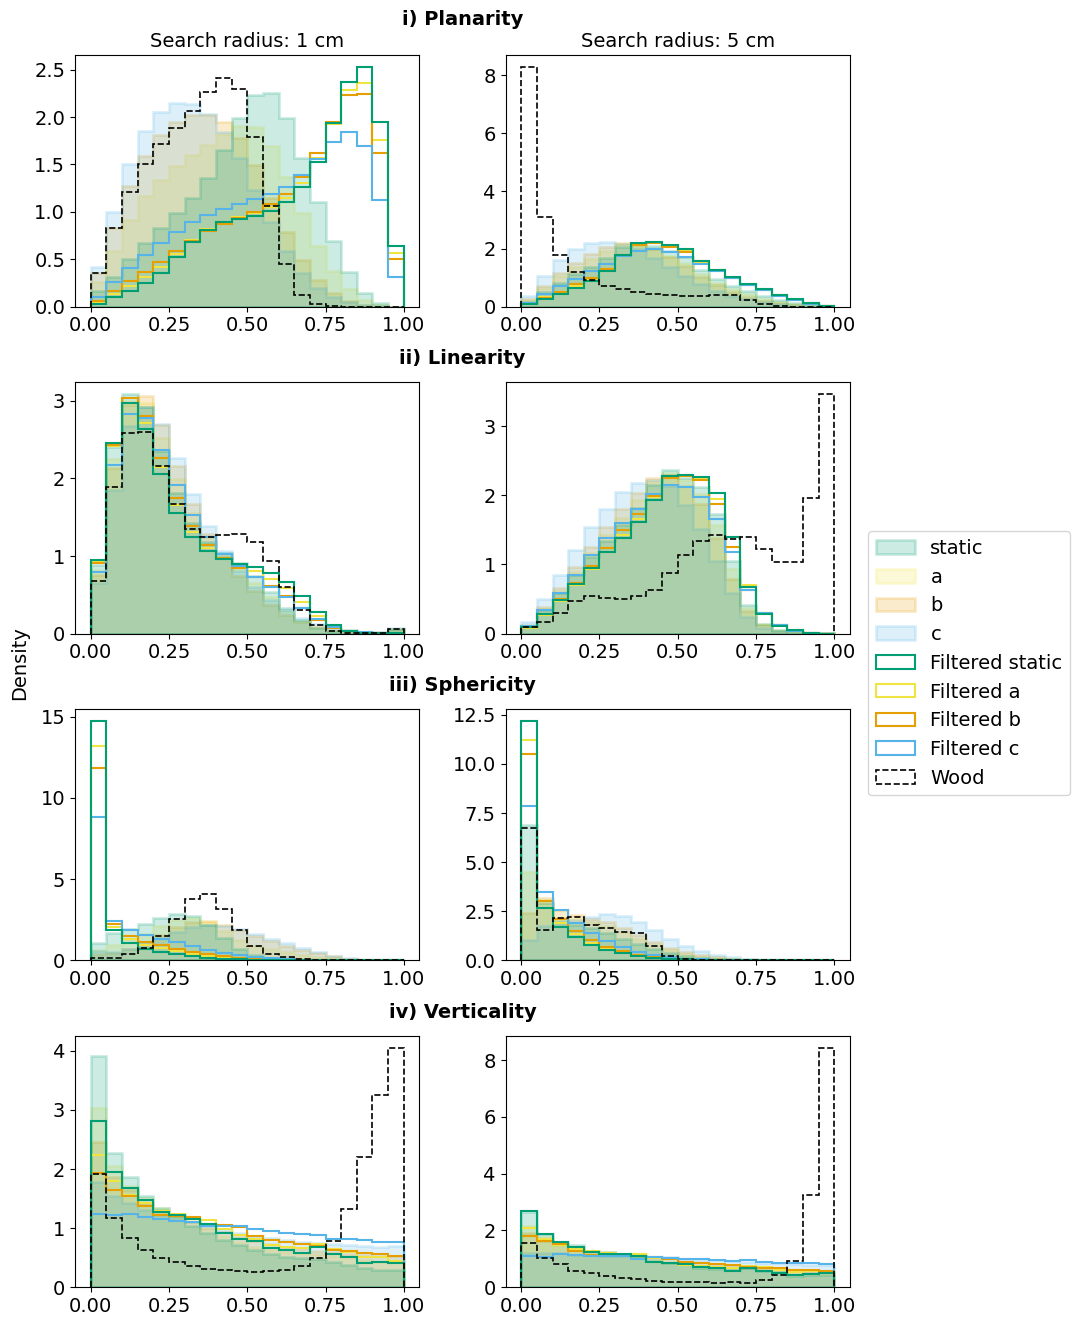

In [30]:
fig_rows = 4
fig_cols = 2
fig, axs = plt.subplots(fig_rows, fig_cols, figsize=(10, 16))
new_order = [3, 0, 1, 2]
label_order = [6, 0, 2, 4, 7, 1, 3, 5]
colors = [okabe_ito[idx] for idx in new_order]
for row_idx, key in enumerate(merged_df_dict["static_vs5"].columns):
    for vs, size, col_idx in zip(["vs1", "vs5"], [1, 5], [0, 1]):
        subnames = [n for n in names_l if vs in n]
        for i, name in enumerate(subnames):
            # first plot regular version
            scenario = name.split("_")[0]
            # Get the frequencies of the combined histogram
            hist, bins = np.histogram(merged_df_dict[name][key], range=(0, 1), bins=20)
            # Normalize by number of trees
            hist_norm = hist / n_trees
            # plot
            axs[row_idx, col_idx].hist(bins[:-1], bins, weights=hist_norm/sum(hist), label=scenario, histtype="stepfilled", edgecolor=colors[i], color=colors[i], lw=2.0, alpha=0.2, density=True)
            # then plot the same for the geometric features after mls filtering
            hist, bins = np.histogram(merged_mls_df_dict[name][key], range=(0, 1), bins=20)
            hist_norm = hist / n_trees
            axs[row_idx, col_idx].hist(bins[:-1], bins, weights=hist_norm/sum(hist), label=f"Filtered {scenario}", histtype="step", color=colors[i], lw=1.5, density=True)
            # and wood version
for row_idx, key in enumerate(merged_wood_df_dict["wood_static_vs5"].columns):
    for vs, size, col_idx in zip(["vs1", "vs5"], [1, 5], [0, 1]):
        subnames = [n for n in names_w if vs in n]
        for i, name in enumerate(subnames):
            # Get the frequencies of the combined histogram
            hist, bins = np.histogram(merged_wood_df_dict[name][key], range=(0, 1), bins=20)
            # Normalize by number of trees
            hist_norm = hist / n_trees
            axs[row_idx, col_idx].hist(bins[:-1], bins, weights=hist_norm/sum(hist), label=f"Wood", histtype="step", color="black", lw=1.2, density=True, linestyle=('dashed'))
handles, labels = axs[row_idx, col_idx].get_legend_handles_labels()
label_order.append(8)
legend = axs[row_idx, col_idx].legend(handles=[handles[i] for i in label_order], labels=[labels[i] for i in label_order], bbox_to_anchor=(1.13, 0.5), loc="center right",  bbox_transform=fig.transFigure)
axs[0, 0].set_title(f"Search radius: 1 cm")
axs[0, 1].set_title(f"Search radius: 5 cm")
grid = plt.GridSpec(fig_rows, fig_cols)
create_subtitle(fig, grid[0, ::], f"i) {merged_wood_df_dict[name].columns[0].capitalize()}", fontweight="semibold")
create_subtitle(fig, grid[1, ::], f"ii) {merged_wood_df_dict[name].columns[1].capitalize()}", fontweight="semibold", y=0.95)
create_subtitle(fig, grid[2, ::], f"iii) {merged_wood_df_dict[name].columns[2].capitalize()}", fontweight="semibold", y=0.95)
create_subtitle(fig, grid[3, ::], f"iv) {merged_wood_df_dict[name].columns[3].capitalize()}", fontweight="semibold", y=0.95)
fig.subplots_adjust(hspace=0.3, wspace=0.25)
plt.text(0.06, 0.5, "Density", fontsize=14, rotation="vertical", va="center", transform=fig.transFigure)
plt.savefig(plot_dir / "geomfeats_histo_both_density.png", dpi=dpi, bbox_inches='tight')
plt.show()

### Real Trees
#### Geometric Features

In [31]:
gf_dir = Path(metric_folder) / "geomfeats_real"
# pre mls
vs1 = gf_dir / "2022-05-11_TLS_tree4_t_filtered_classified_leaves_1_leaves_gf.pkl"
vs5 = gf_dir / "2022-05-11_TLS_tree4_t_filtered_classified_leaves_5_leaves_gf.pkl"

# post mls
vs1_mls = gf_dir / "2022-05-11_TLS_tree4_t_filtered_classified_leaves_1_leaves_gf_mls.pkl"
vs5_mls = gf_dir / "2022-05-11_TLS_tree4_t_filtered_classified_leaves_5_leaves_gf_mls.pkl"

# wood
vs1_wood = gf_dir / "2022-05-11_TLS_tree4_t_filtered_classified_1_wood_gf.pkl"
vs5_wood = gf_dir / "2022-05-11_TLS_tree4_t_filtered_classified_5_wood_gf.pkl"

In [32]:
real_vs1_df = pd.read_pickle(vs1)
real_vs5_df = pd.read_pickle(vs5)
real_vs1_mls_df = pd.read_pickle(vs1_mls)
real_vs5_mls_df = pd.read_pickle(vs5_mls)
real_wood_vs1_df =  pd.read_pickle(vs1_wood)
real_wood_vs5_df =  pd.read_pickle(vs5_wood)

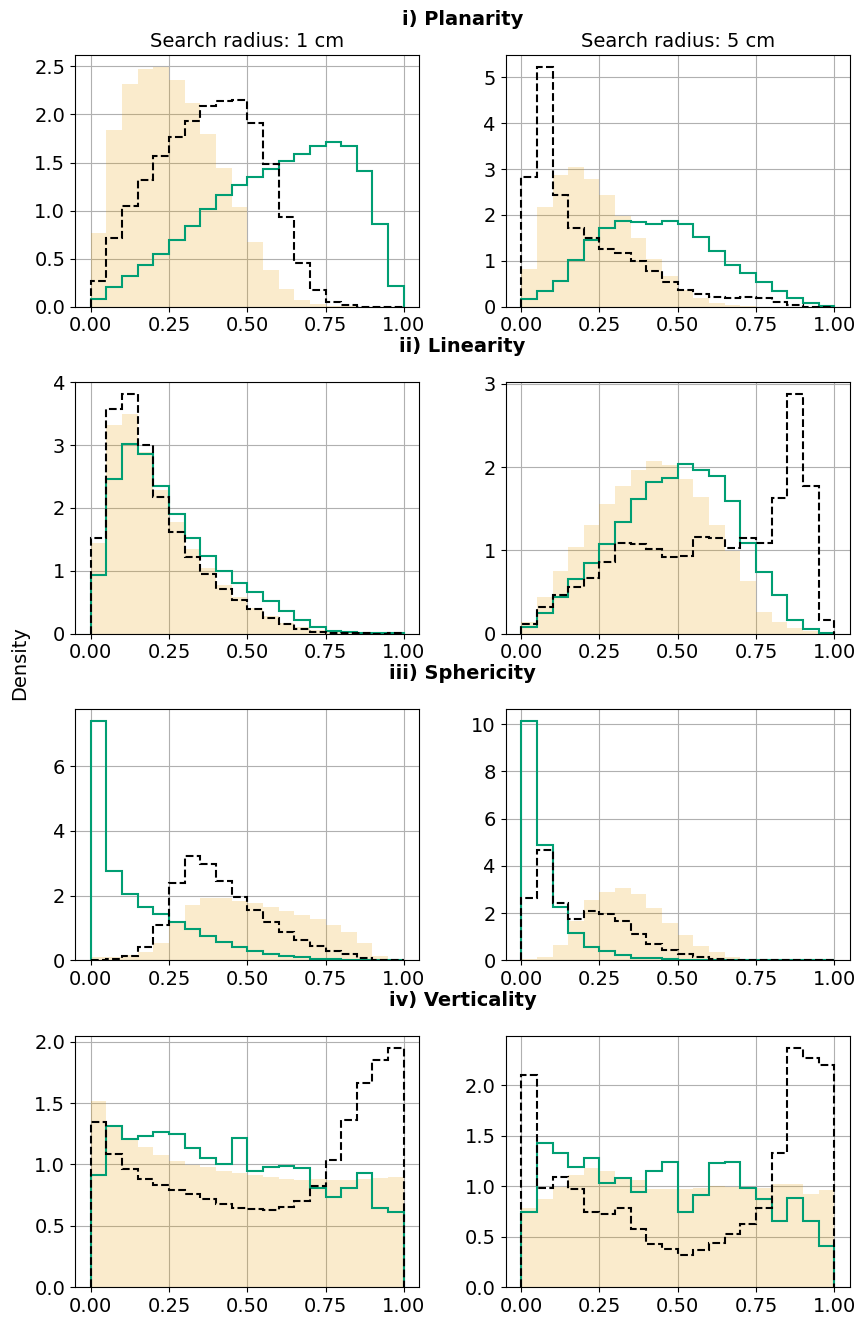

In [33]:
fig_rows = 4
fig_cols = 2
fig, axs = plt.subplots(fig_rows, fig_cols, figsize=(10, 16))
new_order = [3, 0, 1, 2]
colors = [okabe_ito[idx] for idx in new_order]
for row_idx, key in enumerate(real_vs1_df.columns):
    for df, col_idx in zip([real_vs1_df, real_vs5_df], [0, 1]):
        hist, bins = np.histogram(df[key], range=(0, 1), bins=20)
        # plot
        axs[row_idx, col_idx].hist(bins[:-1], bins, weights=hist, histtype="stepfilled", lw=1.5, density=True, alpha=0.2, color=okabe_ito[0])
        axs[row_idx, col_idx].grid()
for row_idx, key in enumerate(real_vs1_df.columns):
    for df, col_idx in zip([real_vs1_mls_df, real_vs5_mls_df], [0, 1]):
        hist, bins = np.histogram(df[key], range=(0, 1), bins=20)
        # plot
        axs[row_idx, col_idx].hist(bins[:-1], bins, weights=hist, histtype="step", lw=1.5, density=True, color=okabe_ito[2])
        axs[row_idx, col_idx].grid()
for row_idx, key in enumerate(real_vs1_df.columns):
    for df, col_idx in zip([real_wood_vs1_df, real_wood_vs5_df], [0, 1]):
        hist, bins = np.histogram(df[key], range=(0, 1), bins=20)
        # plot
        axs[row_idx, col_idx].hist(bins[:-1], bins, weights=hist, histtype="step", lw=1.5, density=True, color="black", linestyle=('dashed'))
        axs[row_idx, col_idx].grid()
grid = plt.GridSpec(fig_rows, fig_cols)
create_subtitle(fig, grid[0, ::], f"i) {real_vs1_df.columns[0].capitalize()}", fontweight="semibold")
create_subtitle(fig, grid[1, ::], f"ii) {real_vs1_df.columns[1].capitalize()}", fontweight="semibold")
create_subtitle(fig, grid[2, ::], f"iii) {real_vs1_df.columns[2].capitalize()}", fontweight="semibold")
create_subtitle(fig, grid[3, ::], f"iv) {real_vs1_df.columns[3].capitalize()}", fontweight="semibold")
plt.text(0.06, 0.5, "Density", fontsize=14, rotation="vertical", va="center", transform=fig.transFigure)
axs[0, 0].set_title(f"Search radius: 1 cm")
axs[0, 1].set_title(f"Search radius: 5 cm")
fig.subplots_adjust(hspace=0.3, wspace=0.25)
plt.show()

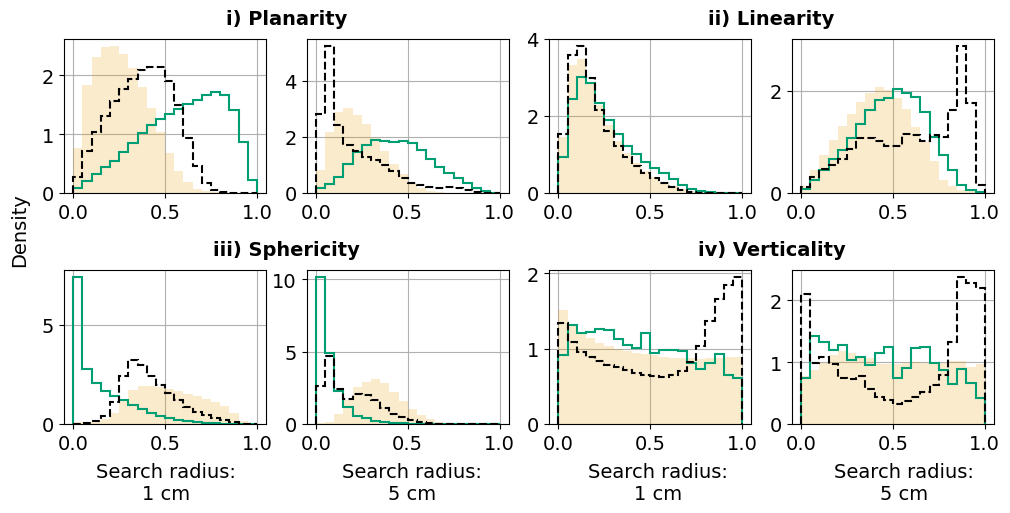

In [34]:
fig_rows = 2
fig_cols = 4
fig, axs = plt.subplots(fig_rows, fig_cols, figsize=(12, 5))
new_order = [3, 0, 1, 2]
col_idx = 0
for key_idx, key in enumerate(real_vs1_df.columns):
    for df1, df2, df3 in  zip([real_vs1_df, real_vs5_df], [real_vs1_mls_df, real_vs5_mls_df], [real_wood_vs1_df, real_wood_vs5_df]):
        hist1, bins1 = np.histogram(df1[key], range=(0, 1), bins=20)
        hist2, bins2 = np.histogram(df2[key], range=(0, 1), bins=20)
        hist3, bins3 = np.histogram(df3[key], range=(0, 1), bins=20)
        # plot
        if key_idx <= 1:
            row_idx = 0
        else: 
            row_idx = 1
        axs[row_idx, col_idx].hist(bins1[:-1], bins1, weights=hist1, histtype="stepfilled", lw=1.5, density=True, alpha=0.2, color=okabe_ito[0])
        axs[row_idx, col_idx].hist(bins2[:-1], bins2, weights=hist2, histtype="step", lw=1.5, density=True, color=okabe_ito[2])
        axs[row_idx, col_idx].hist(bins3[:-1], bins3, weights=hist3, histtype="step", lw=1.5, density=True, color="black", linestyle=('dashed'))
        axs[row_idx, col_idx].grid()
        if col_idx < 3:
            col_idx += 1
        else:
            col_idx = 0
grid = plt.GridSpec(fig_rows, fig_cols)
create_subtitle(fig, grid[0, :2], f"i) {real_vs1_df.columns[0].capitalize()}", fontweight="semibold", y=0.9)
create_subtitle(fig, grid[0, 2:], f"ii) {real_vs1_df.columns[1].capitalize()}", fontweight="semibold", y=0.9)
create_subtitle(fig, grid[1, :2], f"iii) {real_vs1_df.columns[2].capitalize()}", fontweight="semibold", y=0.9)
create_subtitle(fig, grid[1, 2:], f"iv) {real_vs1_df.columns[3].capitalize()}", fontweight="semibold", y=0.9)
plt.text(0.08, 0.5, "Density", fontsize=14, rotation="vertical", va="center", transform=fig.transFigure)
plt.text(0.21, -0.04, "Search radius:\n1 cm", fontsize=14, ha="center", transform=fig.transFigure)
plt.text(0.415, -0.04, "Search radius:\n5 cm", fontsize=14, ha="center", transform=fig.transFigure)
plt.text(0.62, -0.04, "Search radius:\n1 cm", fontsize=14, ha="center", transform=fig.transFigure)
plt.text(0.825, -0.04, "Search radius:\n5 cm", fontsize=14, ha="center", transform=fig.transFigure)
# axs[0, 0].set_title(f"Search radius: 1 cm")
# axs[0, 1].set_title(f"Search radius: 5 cm")
# axs[0, 2].set_title(f"Search radius: 1 cm")
# axs[0, 3].set_title(f"Search radius: 5 cm")
fig.subplots_adjust(hspace=0.5, wspace=0.2)
plt.savefig(plot_dir / "geomfeats_histo_real.png", dpi=dpi, bbox_inches='tight')
plt.show()

#### Voxel-based metrics

In [35]:
tls_vox_metrics_real = "2022-05-11_TLS_tree4_t_filtered_classified_vox.pkl"
tls_vox_metrics_mls_real = "2022-05-11_TLS_tree4_t_filtered_classified_vox_mls.pkl"

vm_df_real = pd.read_pickle(Path(metric_folder) / tls_vox_metrics_real)
vm_df_real_mls = pd.read_pickle(Path(metric_folder) / tls_vox_metrics_mls_real)

In [36]:
vm_df_real

,percentage_filled_vox,mean_ppv,median_ppv,max_ppv,std_ppv
10,15.299145,1867.998138,1024.0,13805,2205.554342
5,8.272537,508.332489,277.0,2955,573.333704
2,3.477241,81.400683,60.0,314,71.948297
1,1.96353,18.283488,17.0,50,11.130654


In [37]:
vm_df_real_mls

,percentage_filled_vox,mean_ppv,median_ppv,max_ppv,std_ppv
10,14.506173,2123.974468,1100.5,21105,2631.485102
5,7.196245,632.146295,311.0,6192,815.110944
2,2.568763,117.567571,71.0,1497,145.505252
1,1.315625,29.759439,20.0,465,35.021328


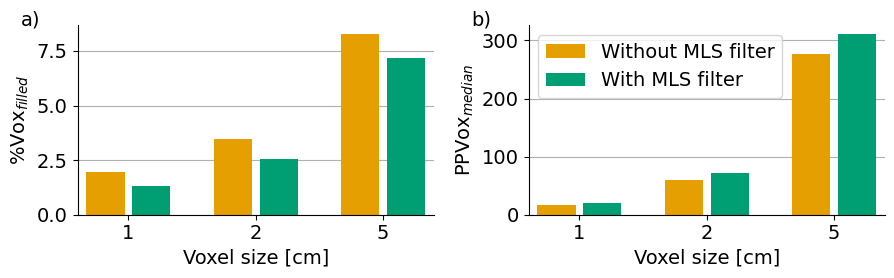

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))
vm_df_real["percentage_filled_vox"].iloc[1:][::-1].plot(kind='bar', ax=ax1, color=okabe_ito[0], rot=0, width=0.3, position=1.1, label="Without MLS filter")
vm_df_real_mls["percentage_filled_vox"].iloc[1:][::-1].plot(kind='bar', ax=ax1, color=okabe_ito[2], rot=0, width=0.3, position=-0.1, label="With MLS filter")
vm_df_real["median_ppv"].iloc[1:][::-1].plot(kind='bar', ax=ax2, color=okabe_ito[0], rot=0, width=0.3, position=1.1, label="Without MLS filter")
vm_df_real_mls["median_ppv"].iloc[1:][::-1].plot(kind='bar', ax=ax2, color=okabe_ito[2], rot=0, width=0.3, position=-0.1, label="With MLS filter")
for ax, label in zip([ax1, ax2], ["a)", "b)"]):
    for pos in ['right', 'top']:
        ax.spines[pos].set_visible(False)
    ax.text(-0.16, 1.0, label, transform=ax.transAxes, fontsize=14)
    ax.yaxis.grid()
    ax.set_xlabel("Voxel size [cm]")
    # ax.set_xticks([0, 1, 2, 3], ["static", "a", "b", "c"])
    ax.set_xlim(-0.4, 2.4)
ax1.set_ylabel("%Vox$_{filled}$")
ax2.set_ylabel("PPVox$_{median}$")
ax2.legend()
plt.tight_layout()
plt.savefig(plot_dir / "vm_bar_real.png", dpi=dpi, bbox_inches='tight')
plt.show()

#### Height metrics

In [39]:
tls_hm_real = "2022-05-11_TLS_tree4_t_filtered_classified_height_metrics.pkl"
tls_hm_real_mls = "2022-05-11_TLS_tree4_t_filtered_classified_height_metrics_mls.pkl"
hm_df_real = pd.read_pickle(Path(metric_folder) / tls_hm_real)
hm_df_real_mls = pd.read_pickle(Path(metric_folder) / tls_hm_real_mls)

In [40]:
hm_df_real

,no_points,no_wood_points,no_leaf_points,Mean,Max,Std,D1,D2,D3,D4,D5,D6,D7,D8,D9
2022-05-11_TLS_tree4,1003146,351440,651706,2.151702,3.27375,0.661386,1.40875,1.542,1.68975,1.838,2.059,2.34625,2.6555,2.9195,3.086


In [41]:
hm_df_real_mls

,no_points,no_wood_points,no_leaf_points,Mean,Max,Std,D1,D2,D3,D4,D5,D6,D7,D8,D9
2022-05-11_TLS_tree4,1003146,351440,651706,2.151698,3.26578,0.661303,1.41158,1.54148,1.68928,1.83628,2.06218,2.34628,2.65608,2.91788,3.08878


In [42]:
hm_df_real - hm_df_real_mls

,no_points,no_wood_points,no_leaf_points,Mean,Max,Std,D1,D2,D3,D4,D5,D6,D7,D8,D9
2022-05-11_TLS_tree4,0,0,0,0.000003,0.00797,0.000083,-0.00283,0.00052,0.00047,0.00172,-0.00318,-0.00003,-0.00058,0.00162,-0.00278


In [43]:
hm_deciles_real = hm_df_real[["D1", "D2", "D3", "D4", "D5", "D6", "D7", "D8", "D9"]]
hm_deciles_real_mls = hm_df_real_mls[["D1", "D2", "D3", "D4", "D5", "D6", "D7", "D8", "D9"]]

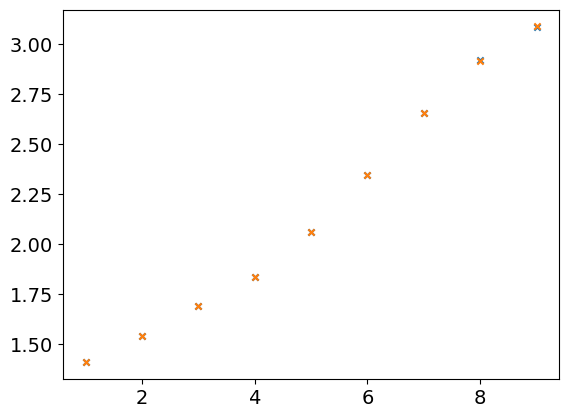

In [44]:
plt.scatter([1, 2, 3, 4, 5, 6, 7, 8, 9], hm_deciles_real, marker="x", label="static", s=20)
plt.scatter([1, 2, 3, 4, 5, 6, 7, 8, 9], hm_deciles_real_mls, marker="x", label="static", s=20)